# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# disable pop_up display of graphs to display them in notebook.
%matplotlib inline

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [2]:
# read in the data
data = pd.read_csv('ExtraaLearn.csv')

In [3]:
# view the first 5 records
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [4]:
# get general info about the structure and features of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [5]:
# view the number of records per feature
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

In [6]:
# make a copy of the original data
df = data.copy()

In [7]:
# Dropping ID column because it has the same number of records as the length of our data
df = df.drop(['ID'], axis=1)

In [8]:
# getting numerical columns
num_cols = list(df.columns[df.dtypes != 'object'])
num_cols

['age',
 'website_visits',
 'time_spent_on_website',
 'page_views_per_visit',
 'status']

**change category names for print_media_type1 -> newspaper and print_media_type1 -> magazine for better clarity**

In [ ]:
# print_media_type1 -> newspaper
df['newspaper'] = df['print_media_type1']
# print_media_type2 -> magazine
df['magazine'] = df['print_media_type2']
# remove the duplicate features
df = df.drop(['print_media_type1', 'print_media_type2'], axis=1)

In [10]:
# getting categorical columns
cat_cols = list(df.columns[df.dtypes == 'object'])
cat_cols

['current_occupation',
 'first_interaction',
 'profile_completed',
 'last_activity',
 'digital_media',
 'educational_channels',
 'referral',
 'newspaper',
 'magazine']

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Observation**
- there are 4612 entries and we can see that the feature *ID* has the same number so that feature likely won't be helpful in our analysis.
- Possibly Correlated Features:
    - *print_media_type1*, *print_media_type2*, *digital_media*, *educational_channels*, *referral*
- *status*, our target variable is a binary continuous variable.

### Univariate Analysis

#### Continuous

##### Summary Statisitcs

In [ ]:
# get a summary of the statistical metrics for our continuous variables
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


**Observations**

*age*
- mean: 46, min: 18, max: 63
- The age of leads trends older.

*status* 
- a binary continuous variable of (0,1) so summary statistics don't really tell us anything about the target variable.

The below variables show that there are likely a few leads who have very high engagement while the rest have minimal-middling engagement. 
- *website_visits*
    - mean: 3.5, min: 0, max: 30
- *time_spent_on_website*
    - mean: 724, min: 0, max: 2537
- *page_views_per_visit*
    - mean: 3, min: 0, max: 18

##### Distributions

In [12]:
# visualize the target feature's (status) binary distribution
df['status'].value_counts(normalize=True)

status
0    0.701431
1    0.298569
Name: proportion, dtype: float64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'website_visits'}>],
       [<Axes: title={'center': 'time_spent_on_website'}>,
        <Axes: title={'center': 'page_views_per_visit'}>]], dtype=object)

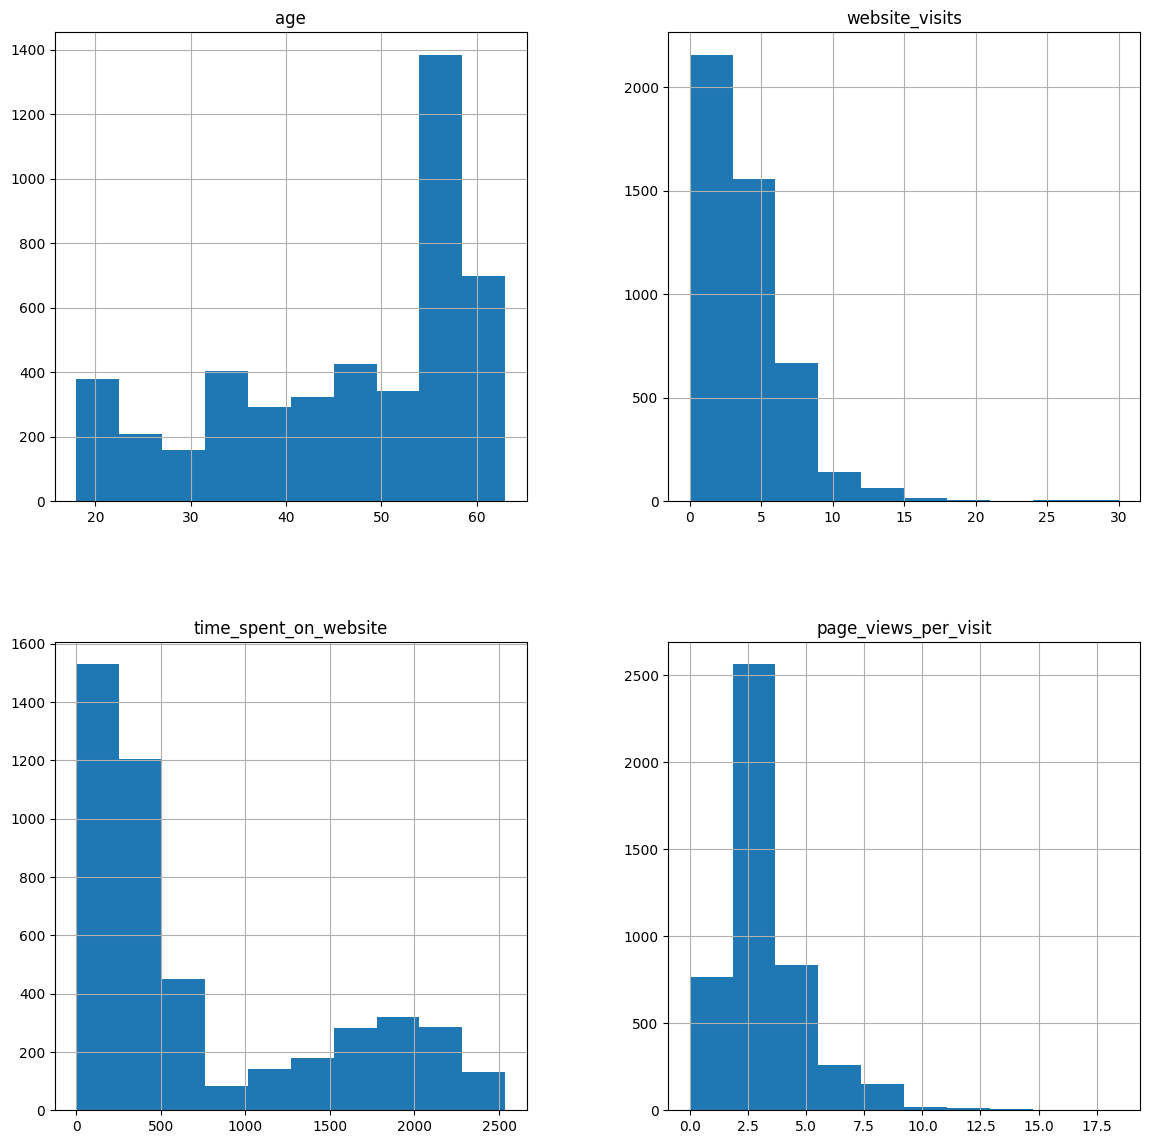

In [ ]:
# plot all other continous variables to better visualize their distributions
df[num_cols[:4]].hist(figsize= (14, 14)) # not plotting status due to it's binary data structure.

In [14]:
def generate_1_D_box_plot(data:pd.DataFrame, x:str, figsize:tuple[int, int]=(15, 10)):
    """ 
    Generate a 1-D Box Plot and display the means.
    Params:
        data: pd.DataFrame, the dataset
        x: str, the data from the dataset to plot
        figsize: tuple(int, int), the size of the resulting boxplot, default: (15,10)
    Returns:
        None
    """
    plt.figure(figsize=figsize)
    plt.title(f"Box Plot: {x}")
    sns.boxplot(data=data, x=x, showmeans=True)

**age**

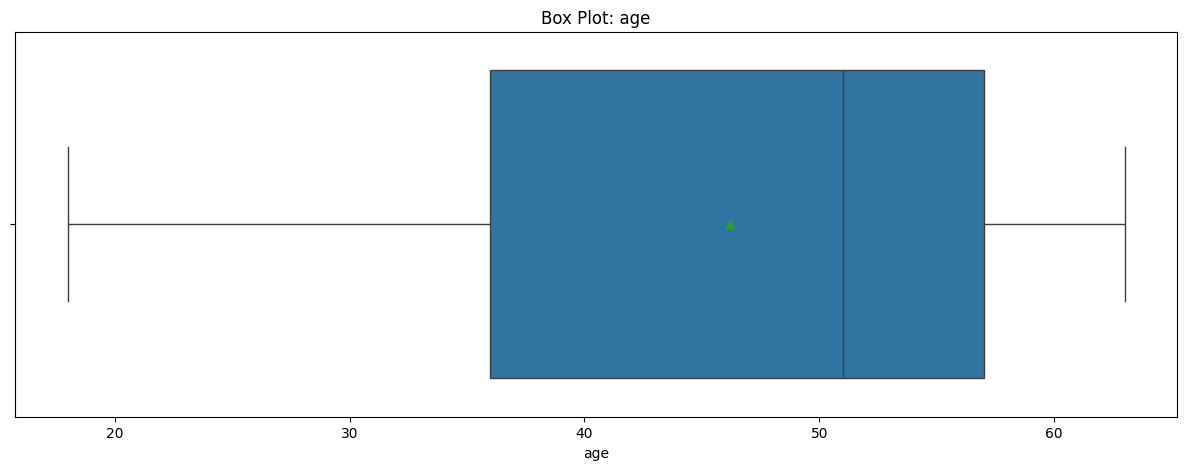

In [15]:
# visualize the age feature's distribution using a boxplot
generate_1_D_box_plot(df, 'age', figsize=(15,5))

**website_visits**

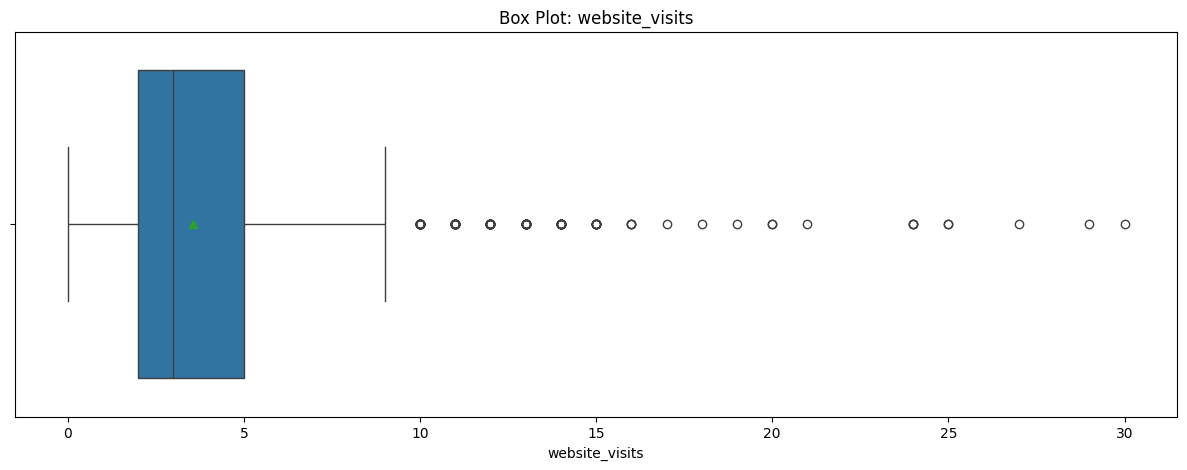

In [ ]:
# visualize the website_visits feature's distribution using a boxplot
generate_1_D_box_plot(df, 'website_visits', figsize=(15,5))

**time_spent_on_website**

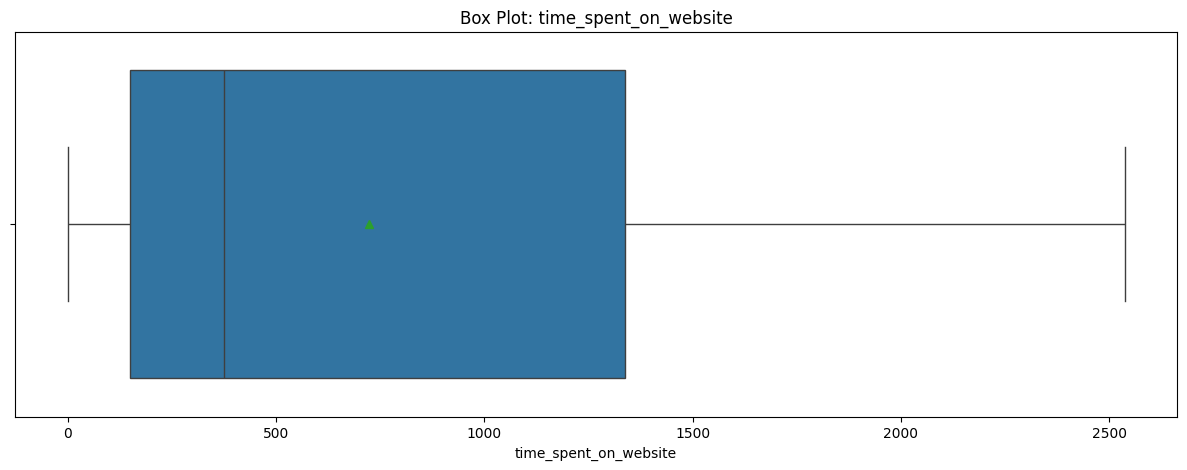

In [ ]:
# visualize the time_spent_on_website feature's distribution using a boxplot
generate_1_D_box_plot(df, 'time_spent_on_website', figsize=(15,5))

**page_views_per_visit**

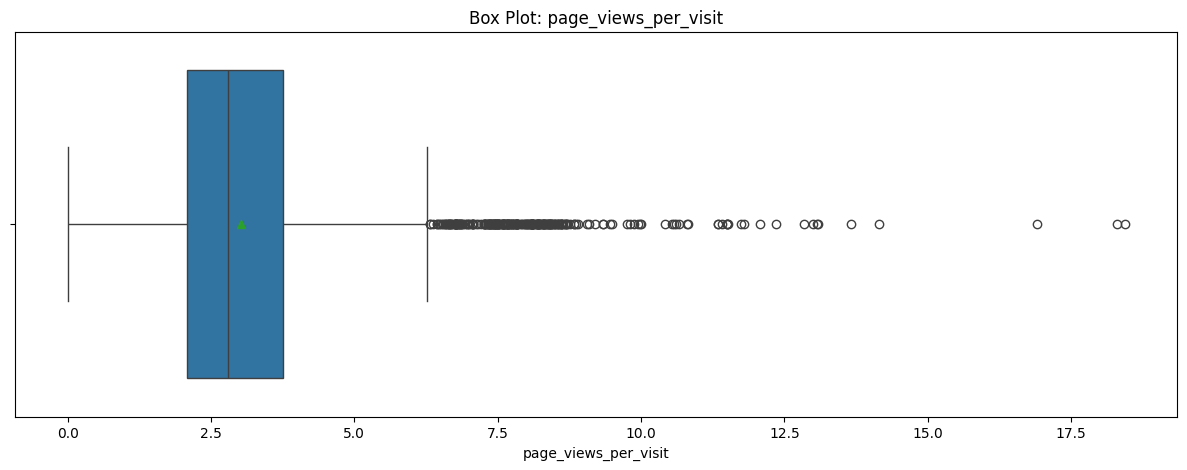

In [ ]:
# visualize the page_views_per_visit feature's distribution using a boxplot
generate_1_D_box_plot(df, 'page_views_per_visit', figsize=(15,5))

##### Observations

**age** 
- The *histogram* shows that age is skewed the the left.
- The *boxplot* shows the same skewdness, but all values fall within the tails of the plot, therefore while there is skewedness there are no outliers. 
- *Therefore*, the leads are generally older with the majority being between 55 - 65, and all other ages are evenly distributed with eachother.  

**website_visits, time_spent_on_website, page_views_per_visit** 
- The *histogram* shows that all of these features are right skewed.
- The *boxplot* shows the same skewdness, but **website_visits** and **page_views_per_visit** display a high number of values that are likely to be outliers. 
- *Therefore*, it appears that the majority of leads don't heavily engage with the website, and these three features reflect similar patterns for this group of leads.

**status** - $\approx 29.85%$, of the total leads are converted to paid customers. 


#### Categorical

##### Summary Statistics

In [19]:
# view the summary of the categorical variables 
df[cat_cols].describe(exclude='number').T

,count,unique,top,freq
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519
newspaper,4612,2,No,4115
magazine,4612,2,No,4379


In [20]:
# get the percent frequency of each unique value in the categorical features
for i in cat_cols:
    print(df[i].value_counts(normalize=True))

    print('-' * 30)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
------------------------------
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
------------------------------
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
------------------------------
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
------------------------------
digital_media
No     0.885733
Yes    0.114267
Name: proportion, dtype: float64
------------------------------
educational_channels
No     0.847138
Yes    0.152862
Name: proportion, dtype: float64
------------------------------
referral
No     0.979835
Yes    0.020165
Name: proportion, dtype: float64
------------------------------
newspaper
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
---

##### Distributions

In [21]:
def generate_bar_graph(data:pd.DataFrame, x:str, figsize:tuple[int, int]=(15,10)):
    """ 
    Generate a bar graph.
    Params:
        data: pd.DataFrame, the dataset.
        x: str, the data from the dataset to plot.
        figsize: tuple(int, int), the size of the resulting bar graph. Default=(15,10)
    Returns:
        None
    """
    plt.figure(figsize=figsize)
    plt.title(f"{x}")
    sns.countplot(data=data, x=x)

**current_occupation**

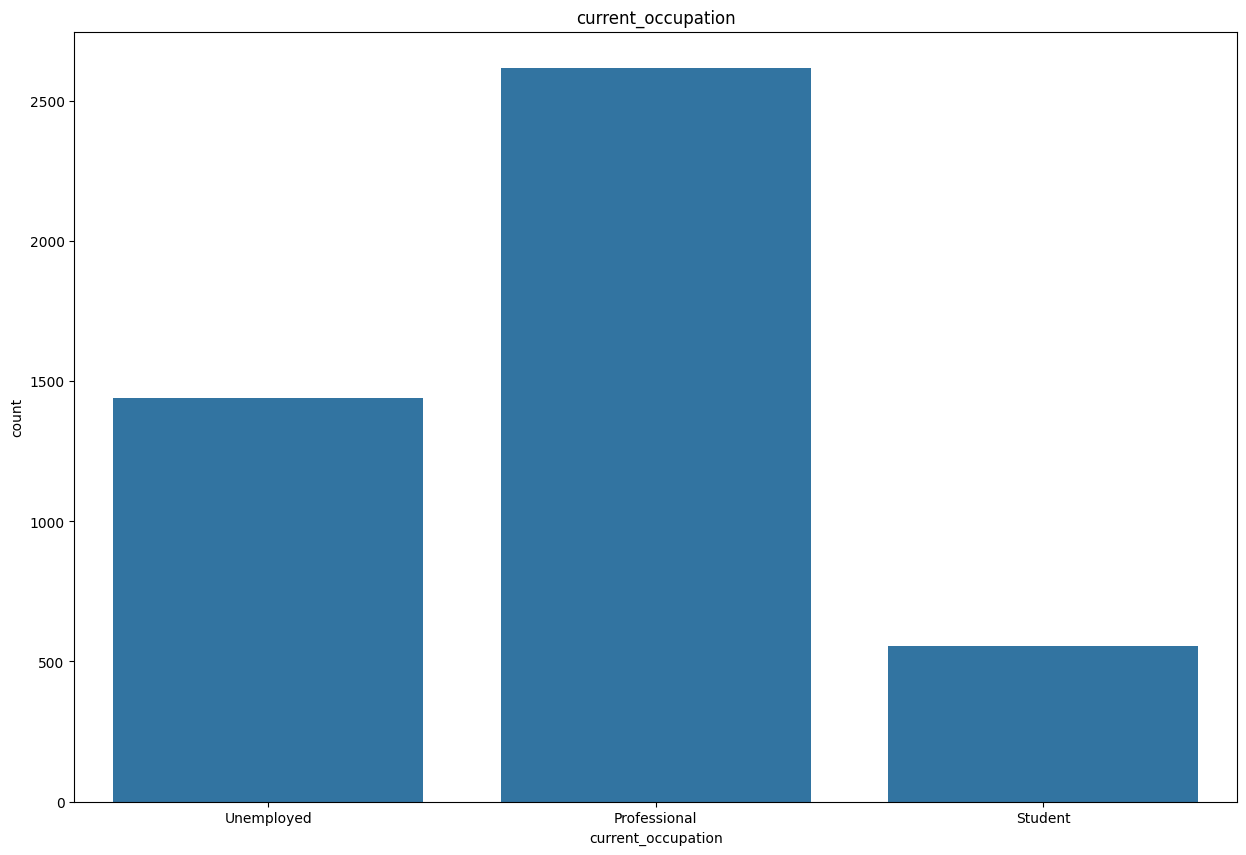

In [22]:
# visualize the current_occupation feature's distribution using a bar graph
generate_bar_graph(df, 'current_occupation')

**first_interaction**

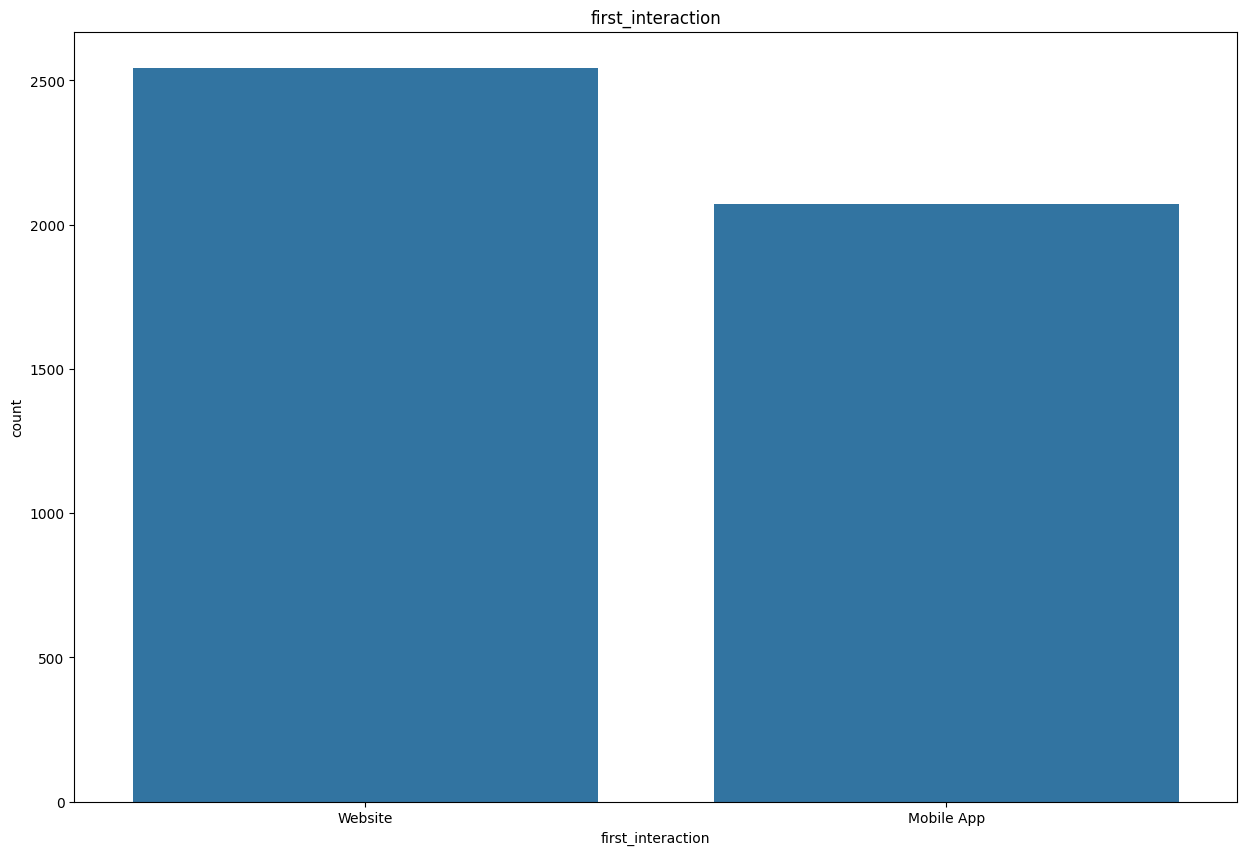

In [ ]:
# visualize the first_interaction feature's distribution using a bar graph
generate_bar_graph(df, 'first_interaction')

**profile_completed**

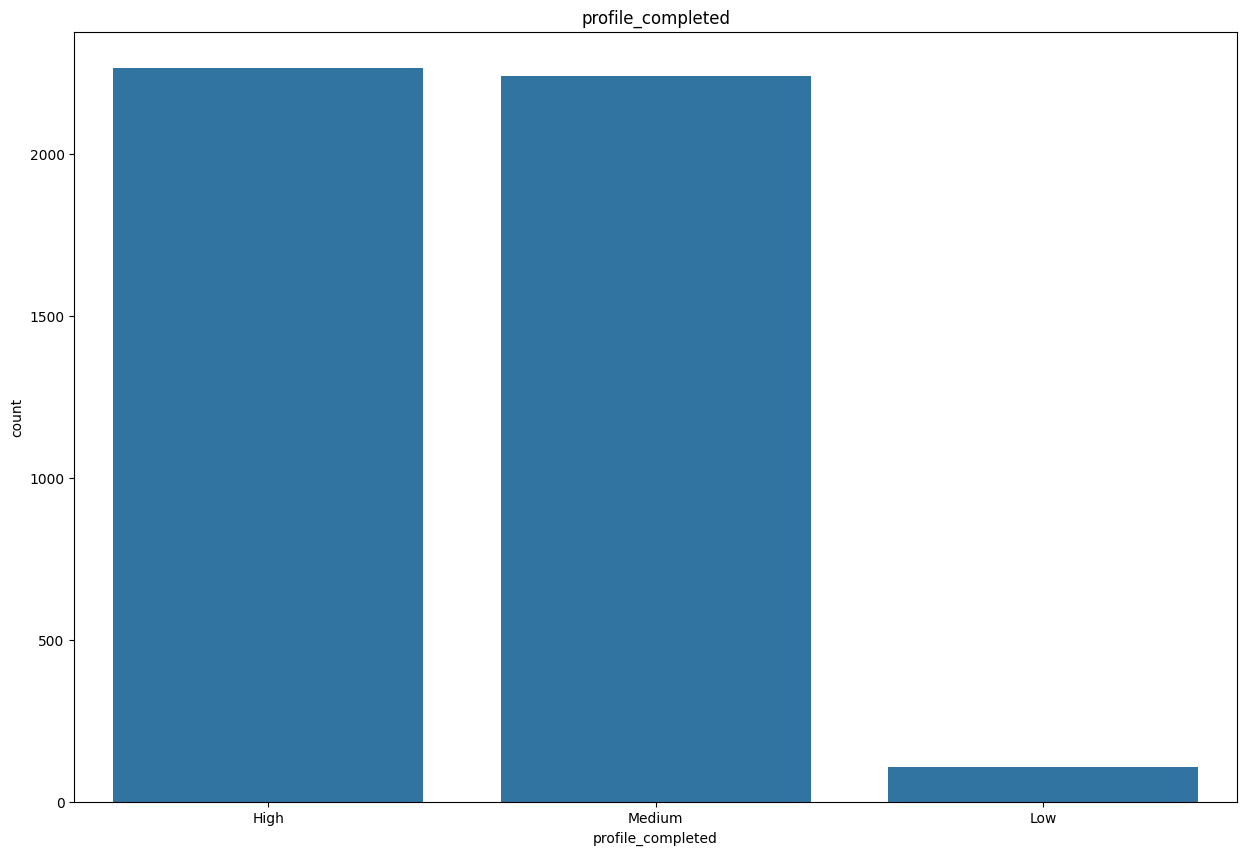

In [ ]:
# visualize the profile_completed feature's distribution using a bar graph
generate_bar_graph(df, 'profile_completed')

**last_activity**

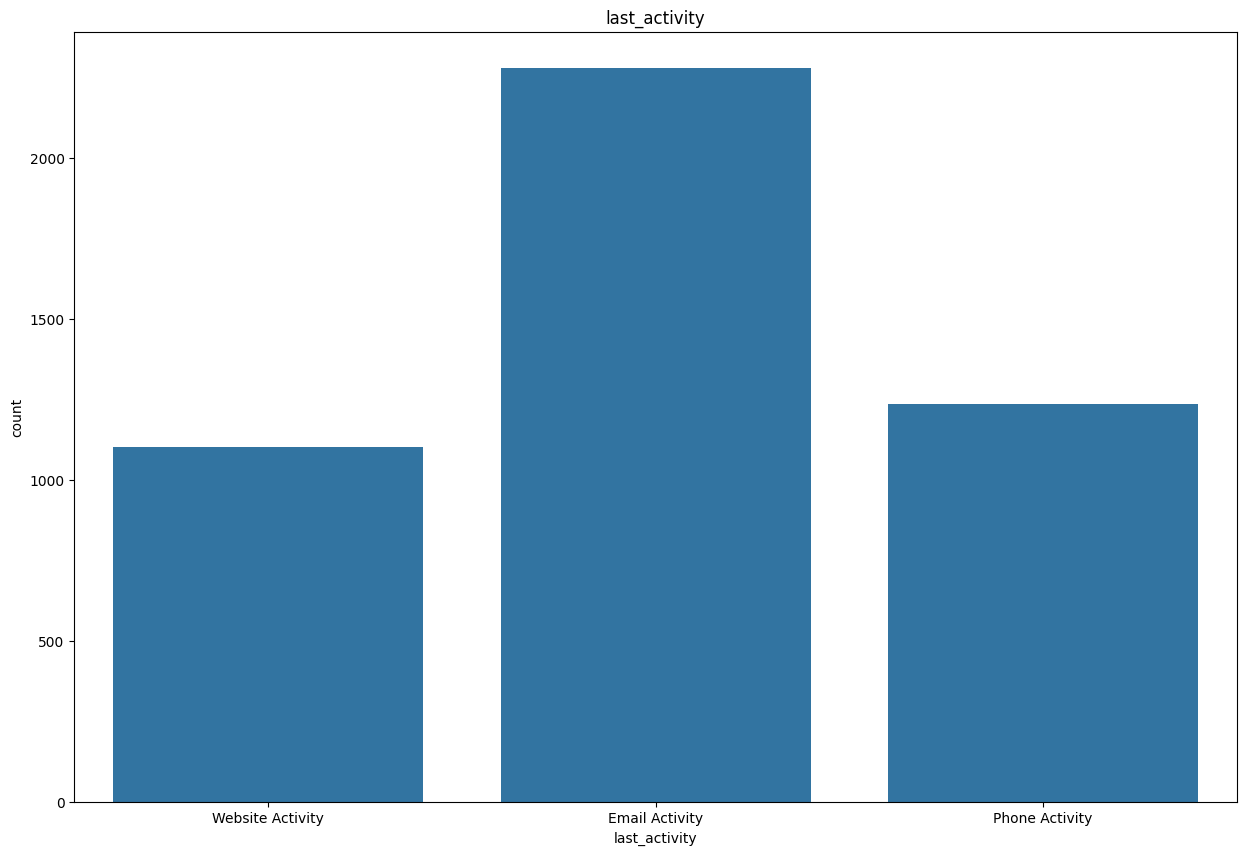

In [ ]:
# visualize the last_activity feature's distribution using a bar graph
generate_bar_graph(df, 'last_activity')

**digital_media, education_channels, referral, newspaper, magazine**

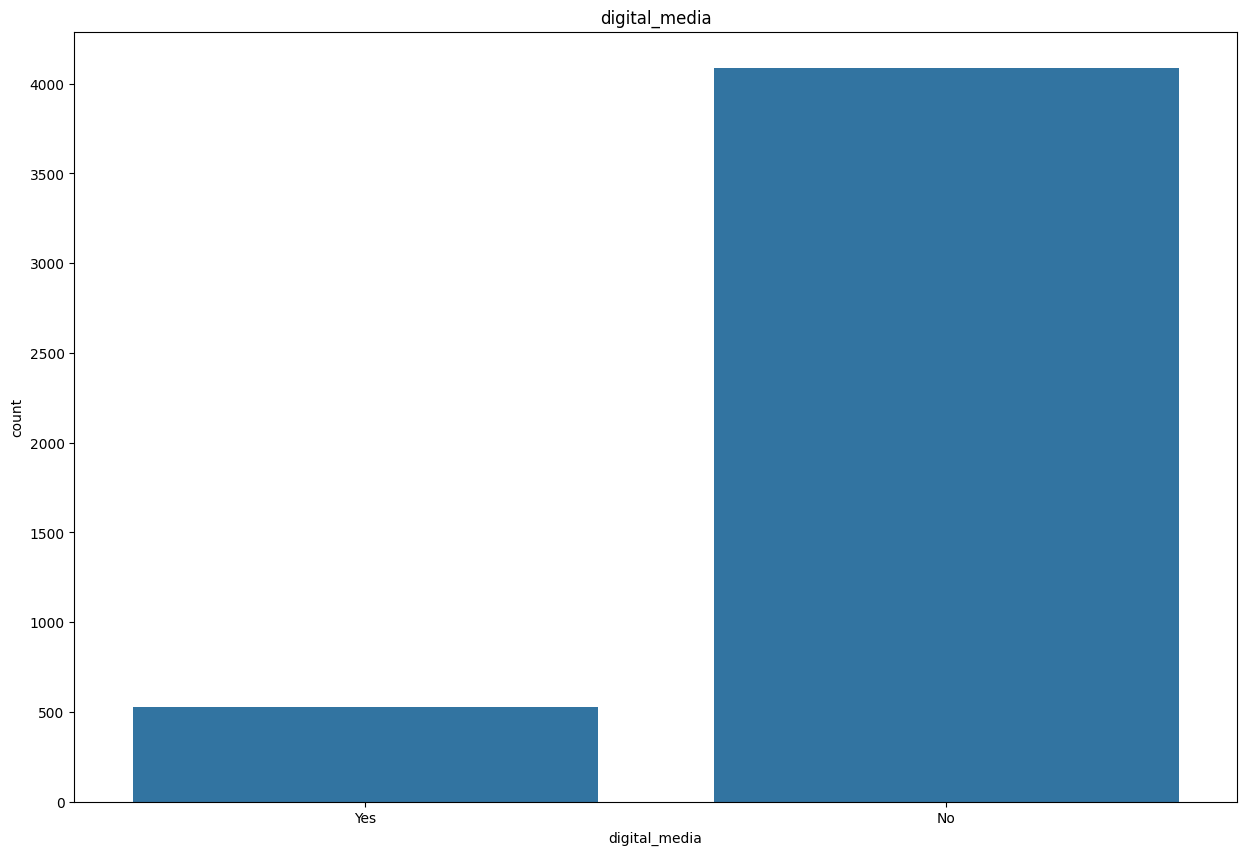

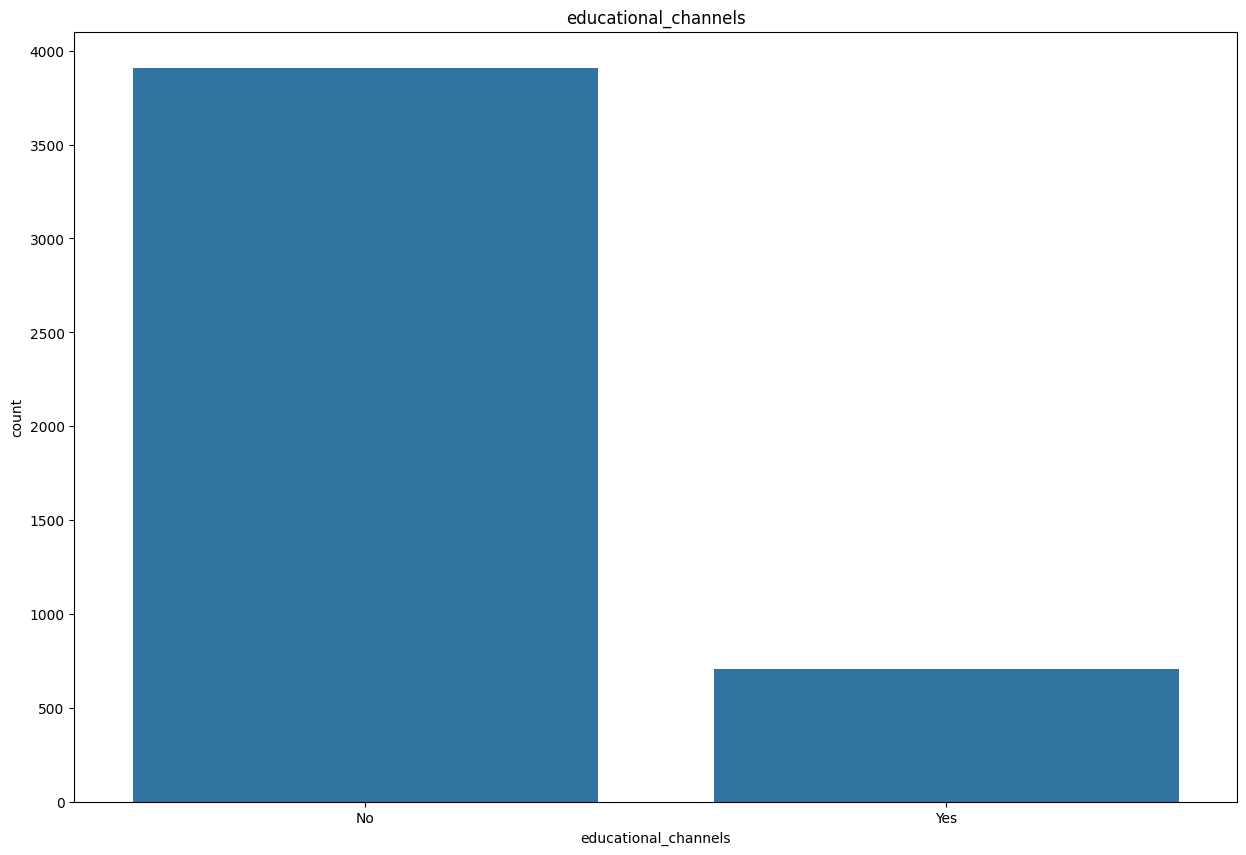

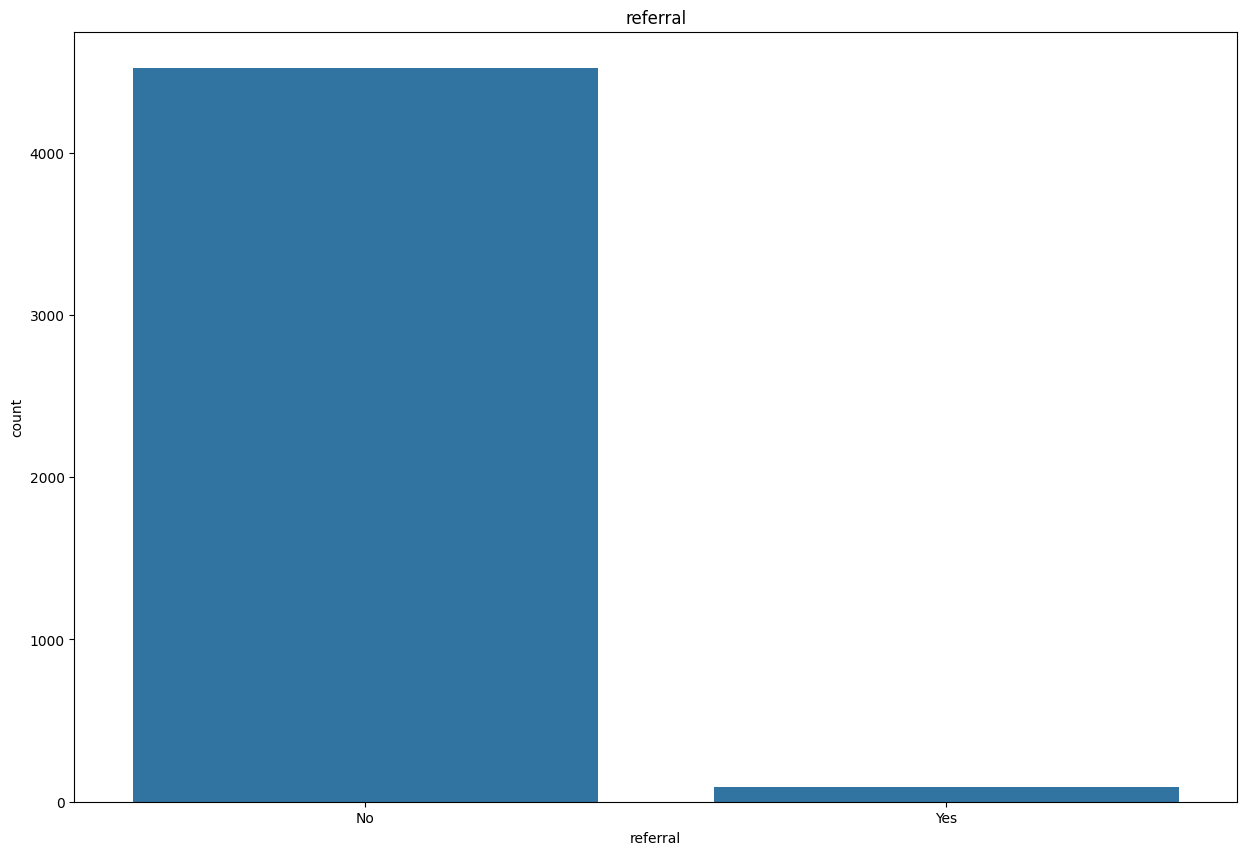

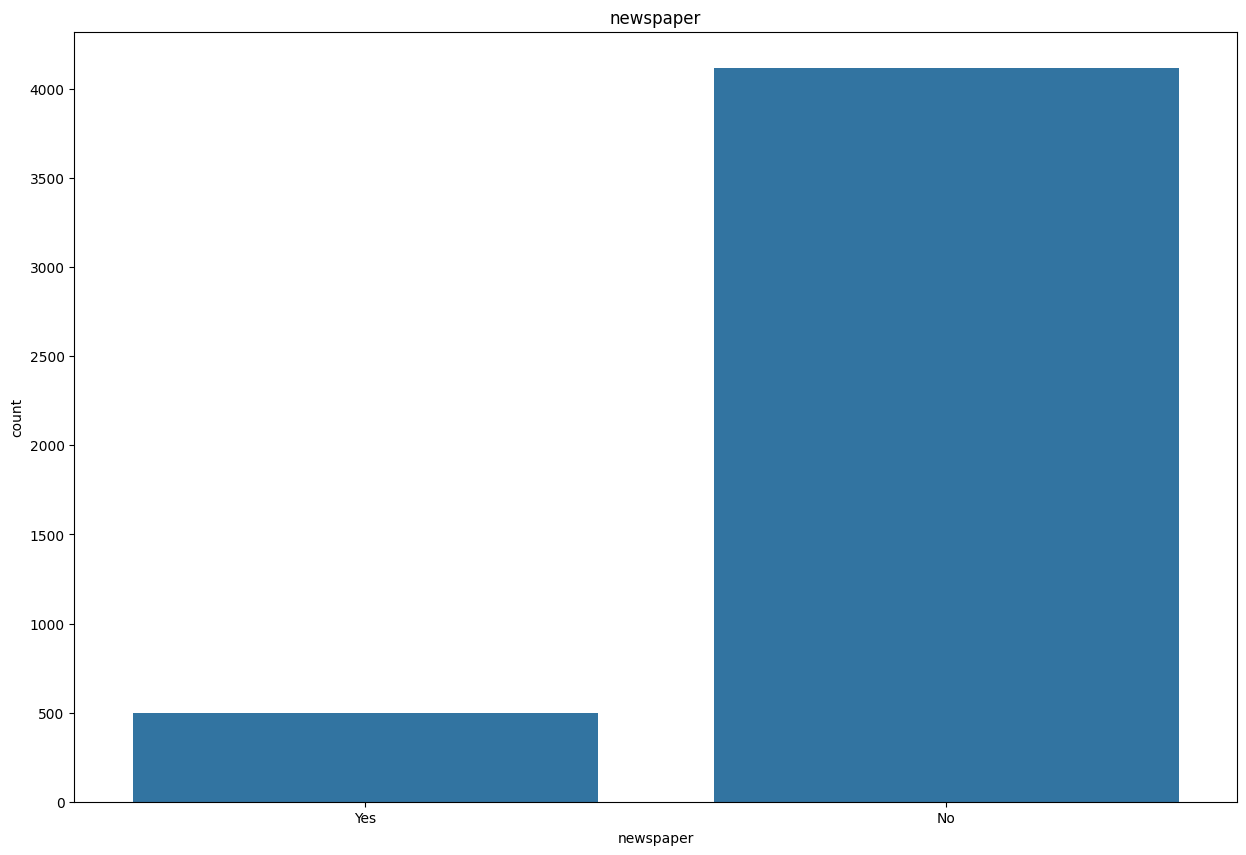

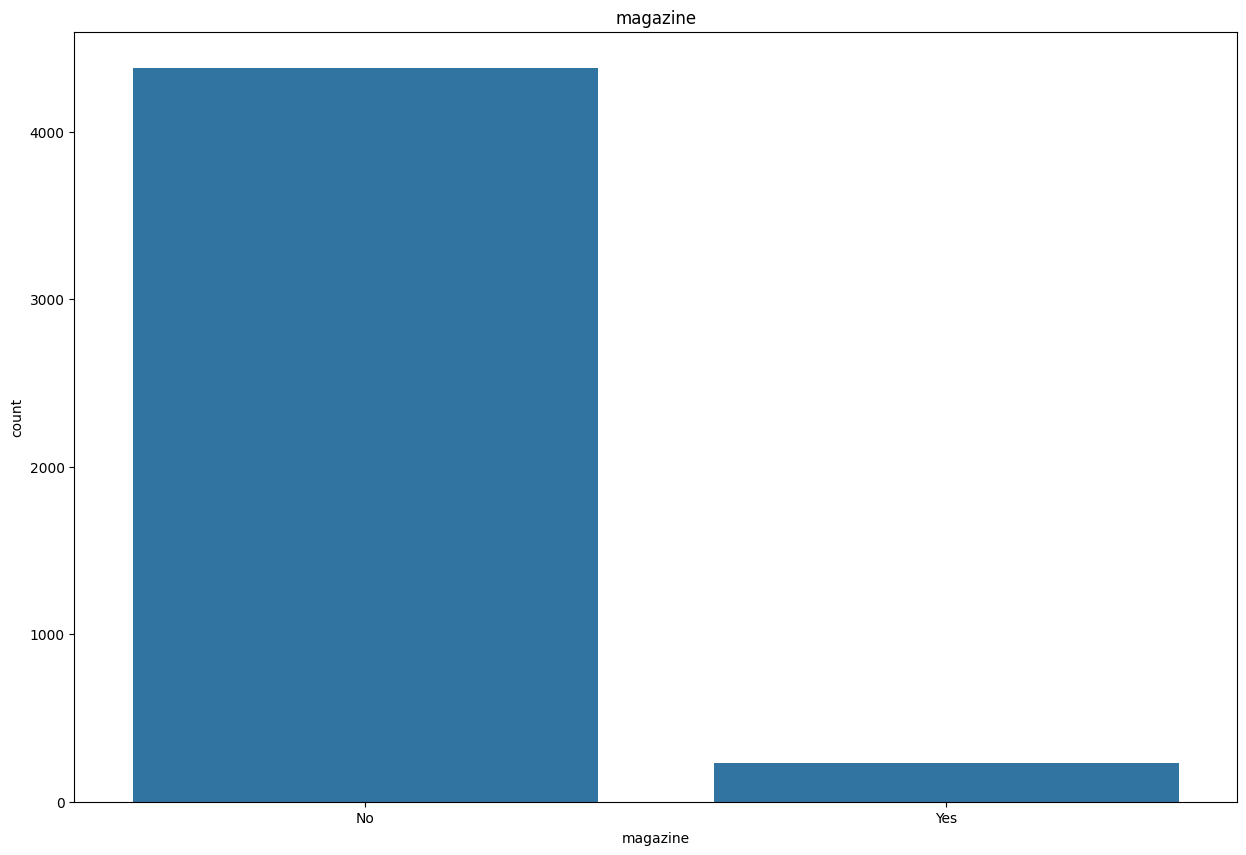

In [ ]:
# visualize all media-type features distributions using a bar graph
media = ['digital_media', 'educational_channels', 'referral', 'newspaper', 'magazine']

for m in media:
    generate_bar_graph(df, x=m)

##### Observations

**current_occupation** `[Professional, Unemployed, Student]`
- The majority of leads appear to be Professional, whlie combination of Unemployed and Student make up the remainder of leads. 

**first_interaction** `[Website, Mobile App]`
- The majority of first interactions appear to be on the website, but there is a less than 10% difference between website and mobile app engagement. 

**profile_completed** `[High, Medium, Low]`
- The majority of leads appear to complete their profile. 

**last_activity** `[Email Activity, Phone Activity, Website Activity]`
- Email activity appear to be the prevailing last interaction method between a lead and ExtraaLearn.
- The combination of Phone and Website activity make up an equal percentage of the last interactions as email activity alone.

**digital_media, educational_channels, referral, newspaper, magazine** `[Yes, No]`
- Advertisement methods appear to show that leads are not finding ExtraaLearn through any of these methods. 
- Of those who do find ExtraaLearn via advertisement, the majority find them through *education_channels*, followed by *digital_media* and *newspaper* respectively. 


### Multivariate Analysis

#### Categorical vs. Status

##### Types of Interaction vs. Status

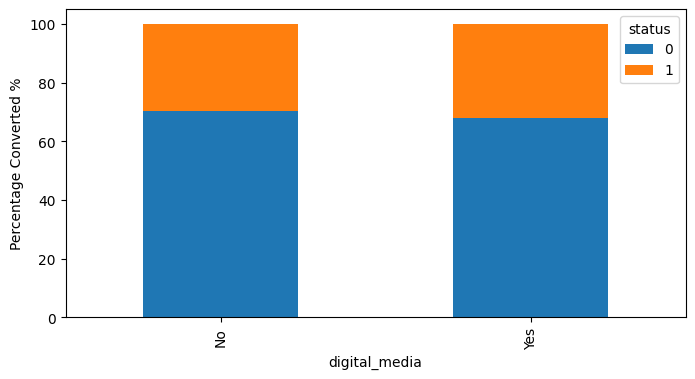

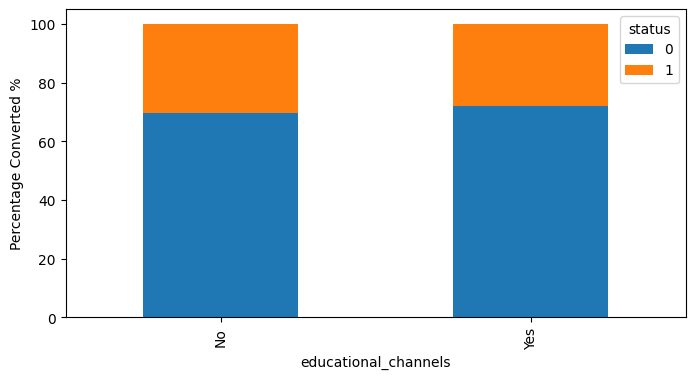

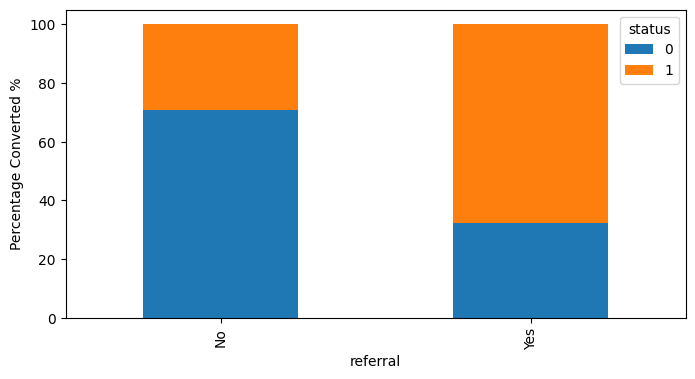

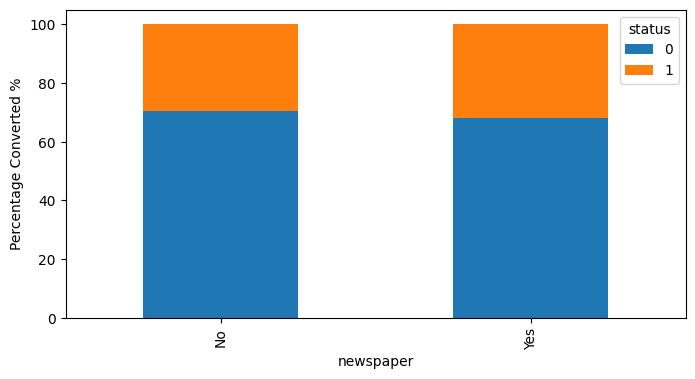

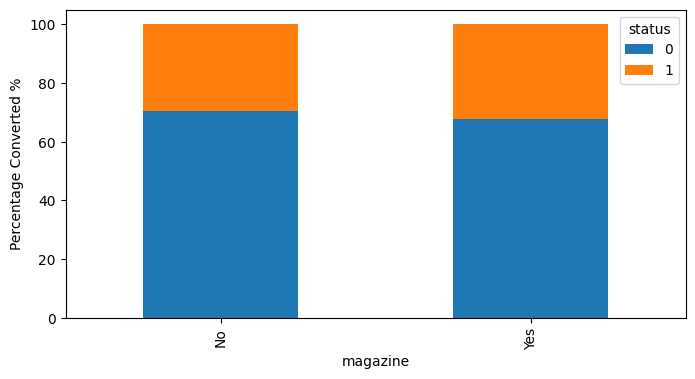

In [ ]:
# visualize interaction based feature vs. target variable class labels distributions using a bar graph
for c in cat_cols[4:]: 
    if c != 'status':
        (pd.crosstab(df[c], df['status'], normalize= 'index')*100).plot(kind = 'bar', figsize = (8, 4), stacked = True)
        plt.ylabel('Percentage Converted %')

**Observations**
- *Media-type* advestisements show approximately the same conversion rate to a paid customer.
- Leads that are *Referred* are more likely to convert. 

##### Other Feature Types vs. Status

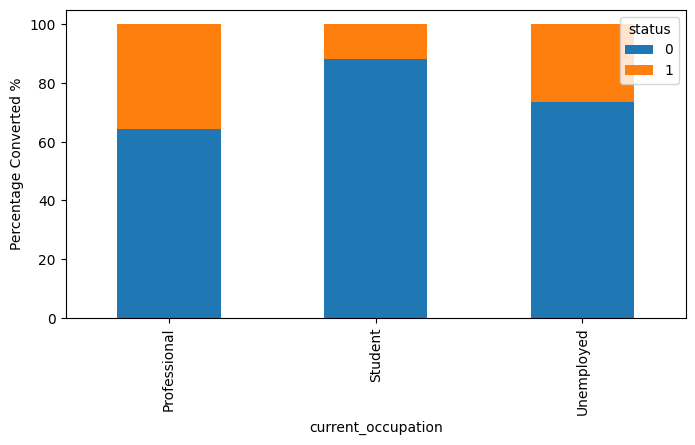

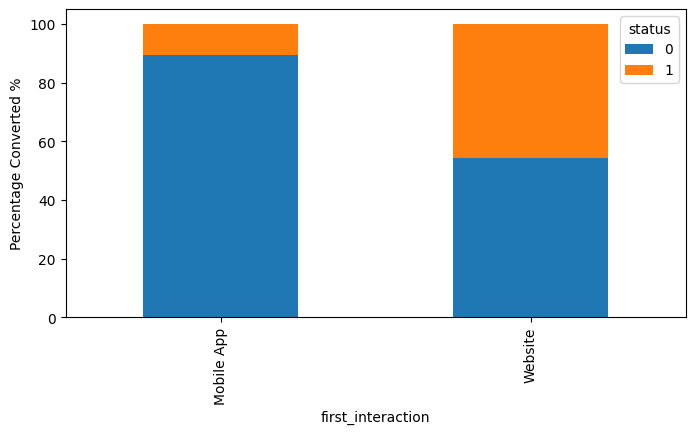

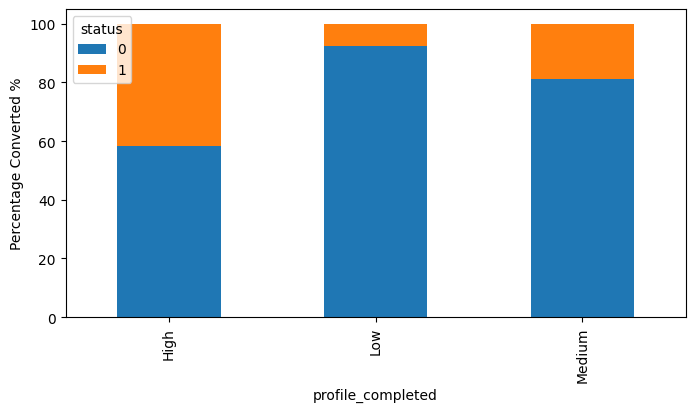

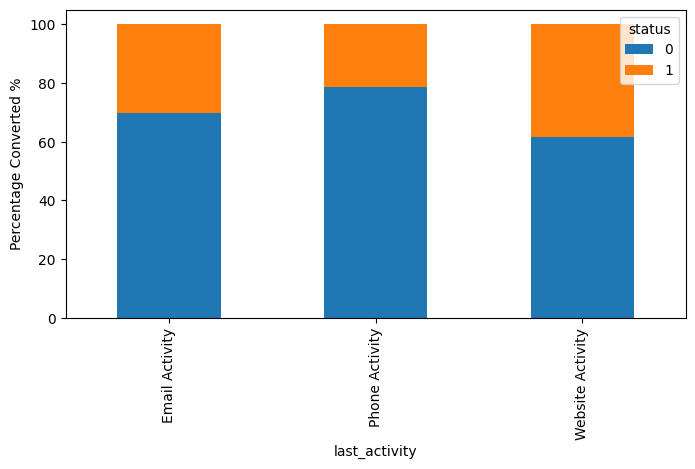

In [28]:
# visualize remaining features vs. target variable class labels distributions using a bar graph
for c in cat_cols[:4]: 
    if c != 'status':
        (pd.crosstab(df[c], df['status'], normalize= 'index')*100).plot(kind = 'bar', figsize = (8, 4), stacked = True)
        plt.ylabel('Percentage Converted %')

**Observations**
- Leads who are *Students* tend to convert less than the other types, with the highest covertion rate being *Professionals*
- A lead's first interaction with ExtraaLearn through its *website* appears to convert more leads to paid customers. 
- *Profile Completion* is a good inidicator on whether or not a lead will convert. 
- While *email activity* was the prevailing method of last interaction between ExtraaLearn and a lead, *website_activity* appears to convert more leads. However, *email activity* is a close second.  

#### Continous vs. Status

##### Relationship Between Continuous Features and Status

In [29]:
# visualize the mean of continous features vs. target variable class labels
df.groupby(['status'])[num_cols[:4]].mean().T

status,0,1
age,45.153014,48.663762
website_visits,3.578980,3.538126
time_spent_on_website,577.420711,1068.397967
page_views_per_visit,3.025732,3.027050


**Observations**
- The *mean age of convertion is 48*, but the mean age of non-convertion is only 3 years younger. 
- The mean *website visits* per lead appear to be evenly distributed between conversion and non-conversion.
- The mean *time spent* on the ExtraaLearn website does appear to affect whether or not a lead converts to a paid customer. 
- The mean *page views* per visit to the ExtraaLearn website appears to be evenly distributed, similar to website visits. 

**Therefore**, `[age, website_visits, page_views_per_visit]` don't appear to provide us with clear indications whether or not a lead will convert to a paid customer, whereas `time_spent_on_website` does appear to be a good indicator.

##### Relationships Between Continous Features

In [30]:
def generate_heatmap(
        data_corr:pd.DataFrame, 
        vmin:float = 0, 
        vmax:float = 1, 
        annot:bool = True, 
        cmap:str | None = 'coolwarm', 
        figsize:tuple[int, int] = (15,10),
        fmt:str = '.2f'
    ):
    """
    Generates a heatmap of two or more numerical variables.

    Params:
        data_corr: pd.DataFrame, the computed pairwise correlation between columns.
        vmin: float, min correlation value to anchor the colormap to. Default=0.
        vmax: float, max correlation value to anchor the colormap to. Default=1.
        annot: bool, display the computed correlation value into the cell. Default=True.
        cmap: str, data to color mapping. Default='coolwarm'.
        figsize: tuple(int, int), the size of the resulting bar graph. Default: (15,10).
        fmt: str, decimal value rounding. Default='.2f'.
    
    Returns:
        None
    """
    plt.figure(figsize=figsize)
    sns.heatmap(
        data=data_corr, 
        vmin=vmin,
        vmax=vmax,
        annot=annot, 
        cmap=cmap, 
        fmt=fmt, 
        xticklabels=data_corr.columns, 
        yticklabels=data_corr.columns
    )

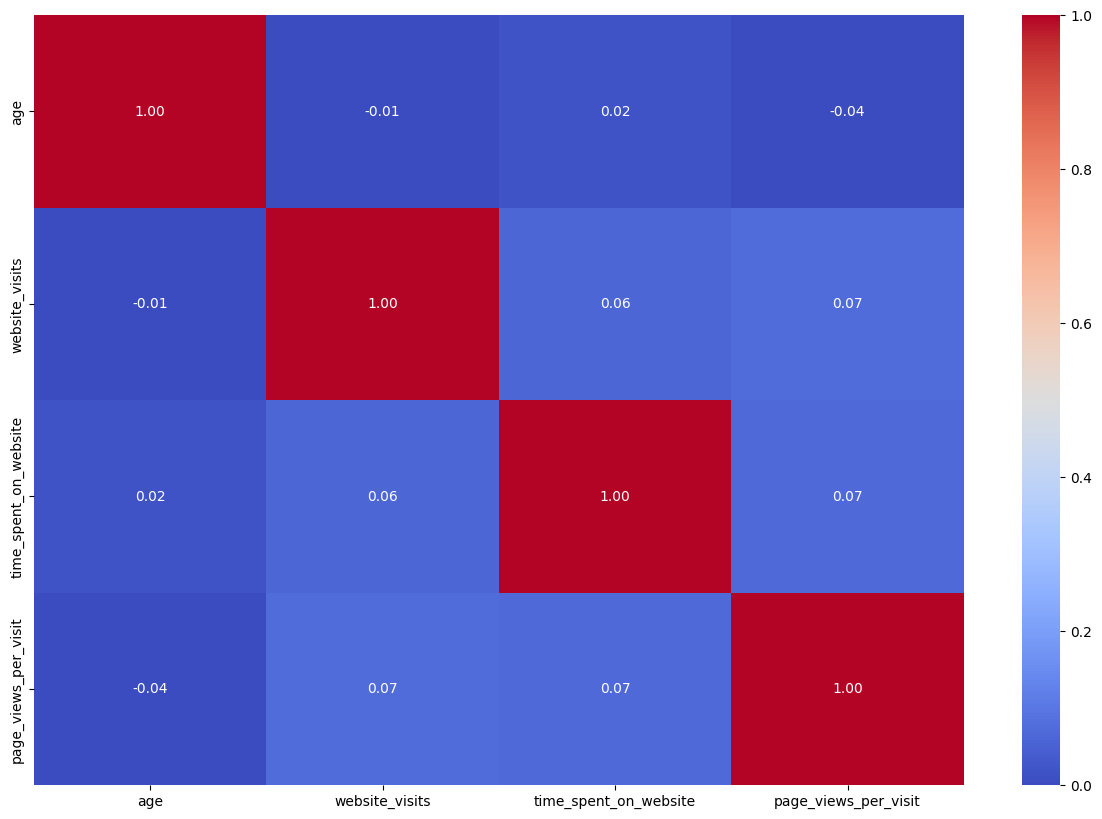

In [ ]:
# visualize the continuous variables against each other to check for correlation between features.
generate_heatmap(df[num_cols[:4]].corr())

**Observations**
- There does not appear to be any strong correlations between our numerical features. 

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Missing Value Check
There are no missing values in our dataset.

In [32]:
# for all features detect missing values and get the total number per feature
df.isna().sum()

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
digital_media            0
educational_channels     0
referral                 0
status                   0
newspaper                0
magazine                 0
dtype: int64

### Outlier Check
As seen in our Univariate analysis of **website_visits** and **page_views_per_visit**, when we drew boxplots of these numerical features we saw that both features had quite a few outliers. 


### Data Preparation

#### Creating dummy variables for categorical features

In [33]:
# Create dummy variables for categorical features that aren't (yes, no)
cat_dummies = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity',]

df = pd.get_dummies(data=df, columns=cat_dummies, drop_first=True)

# Map (yes, no) categorical features to (0,1)
y_n_dummies = ['digital_media', 'educational_channels', 'referral', 'newspaper','magazine']

for d in y_n_dummies:
    dict_dummy = {'Yes': 1, 'No':0}
    df[d] = df[d].map(dict_dummy)

#### Separate target from features

In [ ]:
# save target variable and remove from the features dataset
Y = df['status']

X = df.drop(['status'], axis=1)

**Split data into train(70%) and test(30%) sets**

In [35]:
# split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=30, random_state=1, stratify=Y)

## Model Prediction Error Analysis

**Possible Model Prediction Errors**
1. Predicting a lead *will* convert when the lead *doesn't* convert.
    - False Positive
2. Predicting a lead *will not* convert when the lead *does* convert.
    - False Negative

**Critical Error**</br>
Predicting a lead *will not* convert when the lead *does* convert.
- This is important because ExtraaLearn would lose out on a potential paying customer if this error were to occur in our model.

**Reduction of False Negatives**</br>
For our use case, the best performance metric to use would be Recall.
**Recall** measures the proportion of *True Positives* to all *actual* positives.</br> 

$\dfrac{TP}{TP + FN}$
    
Thereby, if we *maximize* Recall we *minimize* the probablity of *False Negatives*. In doing so we can:
1. Better help ExtraaLearn identify which leads are more likely to convert to paid customers, and locate more accurately the factors driving the lead conversion process.
2. We can then create a profile of the leads which are likely to convert aiding ExtraaLearn in determining potential leads in the future.


**A Note on Other Metrics**</br>
A *Confusion Matrix* is used to measure the performance of a classification algorithm. We will be getting the values of *True Positive* and *False Negative* from this matrix. This matrix also provides the *True Negative* and *False Positive* values used in **Accuracy** and **Precision** classification performance metrics. 

While **Recall** is the metric will be primarily using, it is important to also be able to calculate the other metrics so that we can get the best picture of our model. 


### Performance Metrics and Confusion Matrix

In [36]:
# Confusion Matrix Function - src: Case_Study_Employee_Attrition_Prediction
def metrics_score(actual, predicted):
    """ 
    For a classification model:
        - Get the classification report to view model performance metrics on both class labels(0,1).
        - Compute the Confusion Matrix for the model.
        - Visualize the Confusion Matrix via a heatmap.
    Params:
        actual: the actual target value vector.
        predicted: the estimated target value vector from the model.
    Returns:
        None
    """

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [37]:
# Classification Performance Metric Function - src: Case_Study_Employee_Attrition_Prediction
def model_performance_classification(model, predictors, target):
    """
    Computes different classification metrics to check classification model performance.
        - recall
        - precision
        - accuracy
    Params:
        model: classifier model
        predictors: feature matrix used to estimate target values vector.
        target: actual target values vector. 
    Returns:
        None
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall

    precision = precision_score(target, pred, average = 'macro')              # To compute precision

    acc = accuracy_score(target, pred)                                 # To compute accuracy score


    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf

## Building a Decision Tree model

**A Decision Tree is a Classification model used to classify two or more discrete categories.** 

In our use case, we are looking to classify leads via the **status** variable which represents whether or not a lead has converted to a paying ExtraaLearn customer.

Earlier, we saw that there was an imbalance between *yes* and *no* in the **status** variable where ~29.85% of the leads were converted and thus were tagged with a $1$ for *yes*. We will want to ensure that our Decision Tree does not become biased towards the dominant *no* class and thus increase the likelihood of *False Negative* outcomes.   

In [38]:
# Build the Decision Tree Model
d_tree = DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [39]:
# 'Fit' our data to the Decision Tree Model
d_tree.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


### Model Performance Evaluation

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3214
           1       1.00      1.00      1.00      1368

    accuracy                           1.00      4582
   macro avg       1.00      1.00      1.00      4582
weighted avg       1.00      1.00      1.00      4582



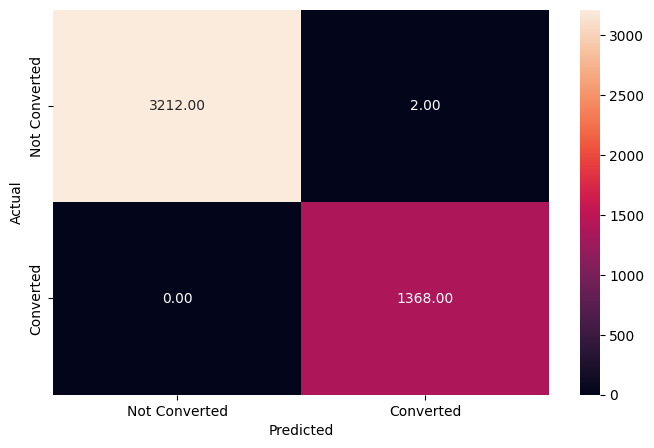

In [40]:
# Training Dataset Model Performance
# get y_predictions
y_train_pred = d_tree.predict(x_train)

# run performance eval and get confusion matrix
metrics_score(y_train, y_train_pred)

**Observations on Training Data**</br>
In our Confusion Matrix we have:
- *True Positive* = 3212
- *True Negative* = 1368
- *False Postive* = 2
- *False Negative* = 0

While the metrics are all calculating as 100%, we can see that we have $2$ *False Positives*. Since we have decided that our main Performance Metric will be **Recall** and Recall is *not* calculated using *False Positives* and since the *False Positive* amount is only two, we will keep them in mind but not place weight on their implications for now. 

In [41]:
# Test Dataset Model Performance
# get overall metrics
d_tree_test = model_performance_classification(d_tree, x_test, y_test)
# display metrics DataFrame
d_tree_test

,Precision,Recall,Accuracy
0,0.761905,0.761905,0.8


**Observations on Test Data**</br>
We can see that for our chosen metric **Recall** the model didn't do as well as on the training set with the $score = 0.76$ compared to $1$ for the training set on predicting when a lead *did not convert*. This means that our model is likely **overfitting** on the training data.

We also see that for the *Precision* metric $0.76$ that the model did much better on the training set as well. This means that there is a non-insignificant chance that the model will predict that a lead will convert when they won't. This is supported by the two False Positives we observed in the training Confusion Matrix. *What this means for ExtraaLearn is that the company may waste valuable time and money on these leads.*

#### Feature Importance
We can evaluate the importance of each feature and then prune unimportant features from our tree to hopefully improve its performance on the test data.

In [42]:
# get the feature importances
feature_importances = d_tree.feature_importances_
# Create a feature by importance DataFrame
# get the feature labels
records = X.columns
# create DataFrame and sort the features from most important to least important
importance_df = pd.DataFrame(feature_importances, index=records, columns=['Importance']).sort_values(by='Importance', ascending=False)
# display feature importance DataFrame
importance_df

,Importance
time_spent_on_website,0.257967
first_interaction_Website,0.183350
profile_completed_Medium,0.147312
page_views_per_visit,0.115110
age,0.102387
website_visits,0.052740
last_activity_Website Activity,0.025359
current_occupation_Unemployed,0.023027
last_activity_Phone Activity,0.022820
current_occupation_Student,0.016328


**Visualize to get a better idea of feature importance**

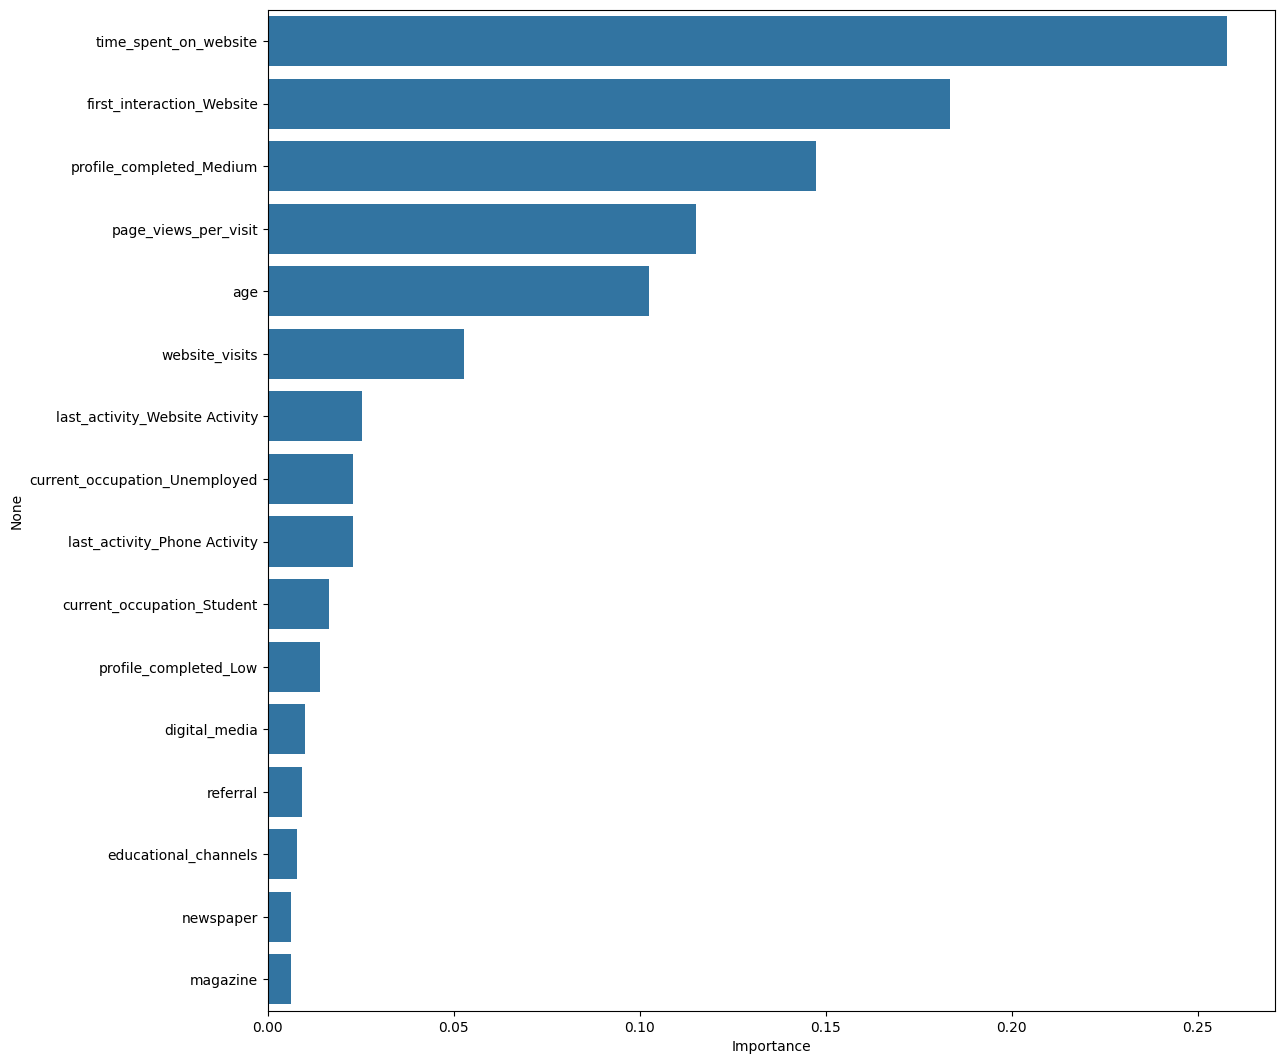

In [43]:
# visualize feature importances as a bar graph
plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance,y=importance_df.index);

**Observations**
- **time_spent_on_website** is the most important feature of our data at ~$0.26$. This is supported by our earlier multivariate comparison analysis to our target where the average amount of time spent on the website by a converted lead was nearly double compared those who didn't convert. 
     - converted = ~1068    
     - not converted = ~577 
- **first_interaction_webiste** is next at ~$0.18$. This too is supported by our earlier multivariate comparision analysis to our target where just shy of 50% of those whose first interaction was ExtraaLearns website converted to paying customers, compared to those whose first interaction was through their mobile app. This might signify that leads are not satisfied with the mobile app and/or have a strong preference for website interactions.

Other important features are:
- **profile_completed_medium** at ~$0.14$
- **page_views_per_visit** at ~$0.12$
- **age** at ~$0.10$

These features having significant importance is interesting because their importance is *not* supported by the multivariate comparison analysis we did earlier. Intuitively, **Age**, given the two most important features of **time_spent_on_website** and **first_interaction_webiste**, may play a much greater role in whether or not a lead will convert than earlier analysis has indicated. 

### Tuning Using GridSearchCV

**Hyperparameters to Tune**
- *criterion*: {gini, entropy}
    - The impurity measure
- *max_depth*: {2, 3, 4, 5, 6, 7, 8, 9}
    - The depth of the tree
- *min_samples_leaf*: {5, 10, 20, 25}
    - The number of samples required to be at a leaf node. 

In [44]:
# GridSearch Hyperparameter Tuning
# create the classifier
d_tree_tuner = DecisionTreeClassifier(class_weight='balanced', random_state=1)

# set parameter grid to chose from 
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]}

# Set the type of scoring to use to Recall for parameter combination comparisons, 
# and make comparisons on class=1(converted).
scorer = metrics.make_scorer(recall_score, pos_label=1)

# run grid search using k=5 for cross-validation
gridCV = GridSearchCV(d_tree_tuner, parameters, scoring=scorer, cv=5)

# fit the cross-validation 
gridCV_fit = gridCV.fit(x_train, y_train)

# save best parameter combination
d_tree_estimator = gridCV_fit.best_estimator_

# fit best classifier to data
d_tree_estimator.fit(x_train, y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,np.int64(3)
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


#### Check performance on training set

              precision    recall  f1-score   support

           0       0.95      0.74      0.83      3214
           1       0.60      0.90      0.72      1368

    accuracy                           0.79      4582
   macro avg       0.77      0.82      0.77      4582
weighted avg       0.84      0.79      0.80      4582



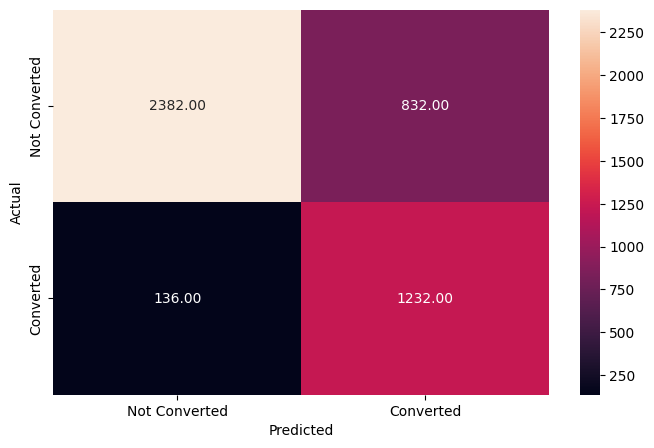

In [ ]:
# Tuned Training Dataset Model Performance
# get y_predictions
y_train_pred_tuned = d_tree_estimator.predict(x_train)
# run performanc eval and get confusion matrix
metrics_score(y_train, y_train_pred_tuned)

**Observations**<br>
**Recall**<br>
Our previous metrics were:
- *precision* = ${0:1,\,1:1}$
- *recall* = ${0:1,\,1:1}$
- *accuracy* = $1$

Our previous confusion matrix was:
- *True Positive* = 3212
- *True Negative* = 1368
- *False Postive* = 2
- *False Negative* = 0

**Post Hyperparameter Tuning**
- *precision* = ${0:0.95,\,1:0.60}$
- *recall* = ${0:0.74,\,1:0.90}$
- *accuracy* = $0.79$
- *True Positive* = 2382
- *True Negative* = 1232
- *False Postive* = 832
- *False Negative* = 136

We can see that the performance on the training set has **gone down** which means that we are handling the overfitting we were seeing previously. 

#### Checking tuned classifier test data performance 

In [46]:
# Tuned Test Dataset Model Performance
tuned_test = model_performance_classification(d_tree_estimator, x_test, y_test)
# display tuned test model performance results
tuned_test

,Precision,Recall,Accuracy
0,0.821429,0.880952,0.833333


**Observations**<br>
**Recall** our previous metrics on our test subset for predicting whether a lead *will not convert*:
- *Precision* = 0.76
- *Recall* = 0.76	
- *Accuracy* = 0.8

**Post Hyperparameter Tuning**
- *Precision* = 0.82
- *Recall* = 0.88	
- *Accuracy* = 0.83

We can see that our hyperparameter tuning has improved our models ability to detect patterns in our data and thus improved generalization over unseen data. 

### Visualizing the Tuned Decision Tree

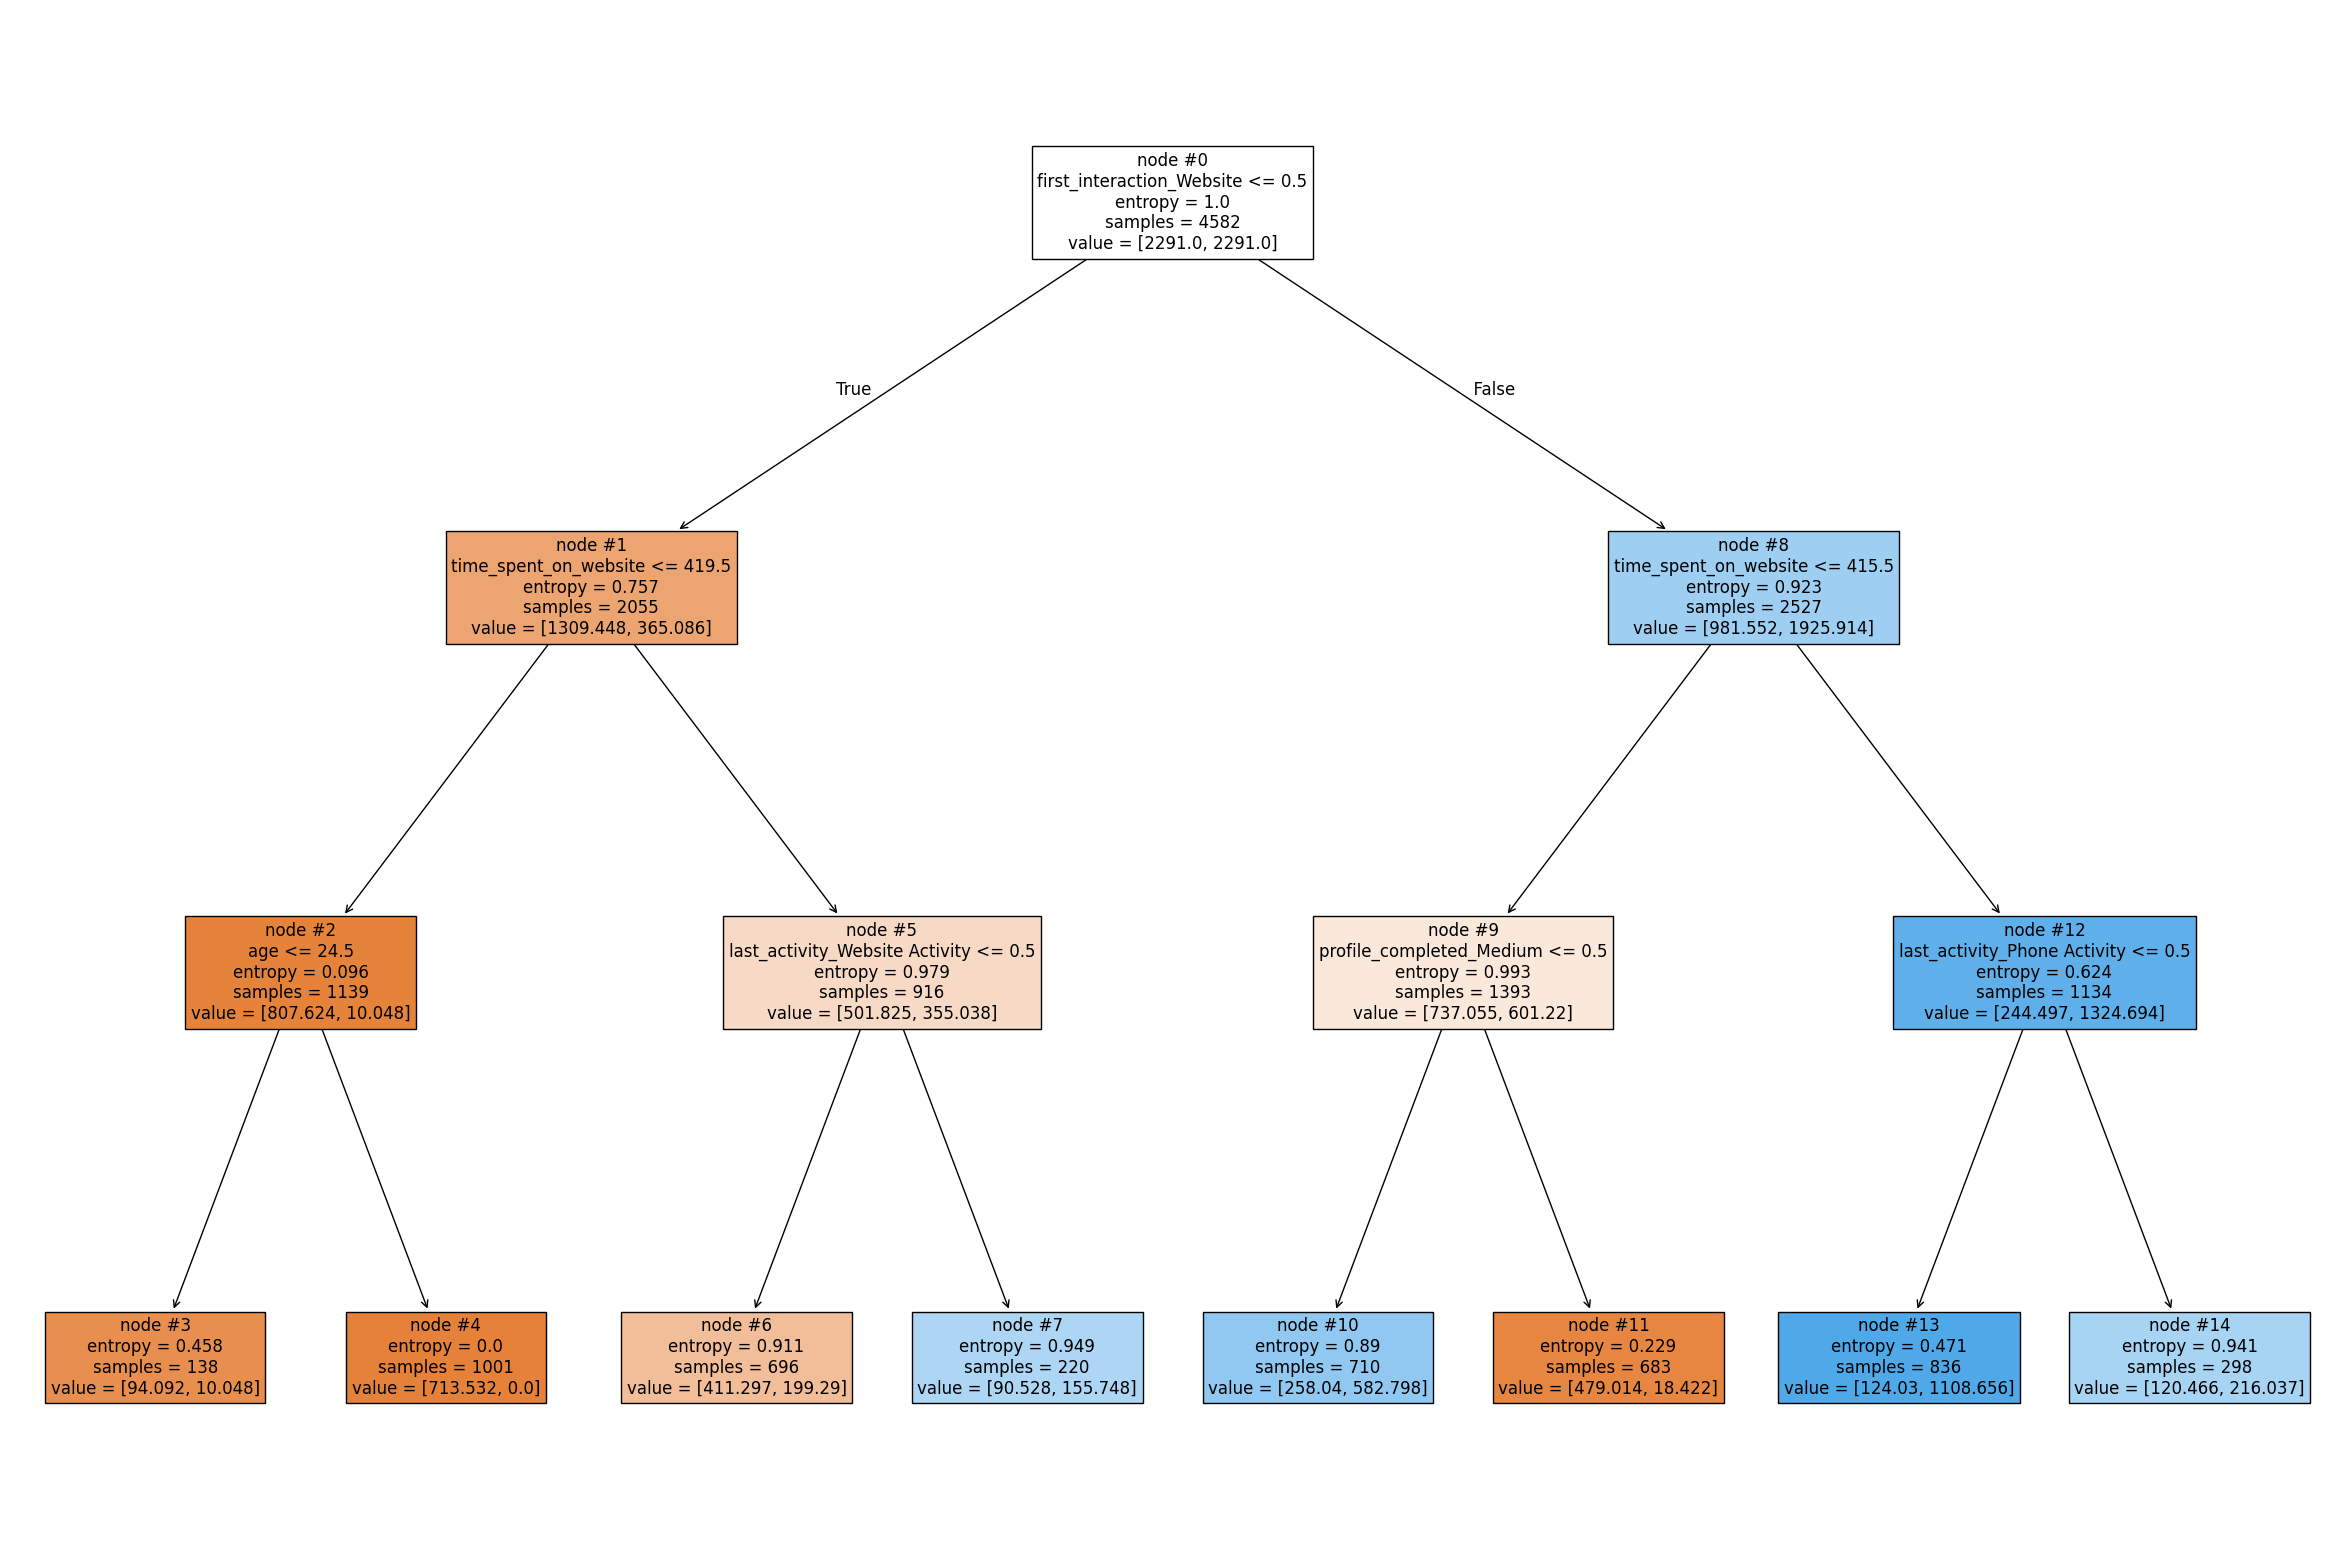

In [ ]:
# get the list of features in the Decision Tree
features = list(X.columns)
# set the plot dimensions
plt.figure(figsize=(30, 20))
# plot the decision tree with max_depth = 3 based on best estimator results from GridCV
tree.plot_tree(d_tree_estimator, max_depth=3, feature_names=features, filled = True, fontsize = 12, node_ids = True, class_names = None)
plt.show()

**Observations**<br>
*NOTE:* blue leaves represent conversion of a lead, and orange leaves represent non-conversion of a lead. 
- Leads whose **first interaction** with ExtraaLearn is through the **website** have a higher likelihood of coverting to paid customers. This could possibly be because websites in general provide a lower barrier to interaction than mobile apps.
- The **time a lead spends on the website** does seem to have an affect on whether or not a lead will convert because the more time a lead spends on the ExtraaLearn website the more familiar they can become with the product and thus have a greater chance to form a potentially positive opinion of ExtraaLearn and want to use the product.
    - Furthering this, leads who do not have a **profile completion status of medium** appear to be more likely to convert to paying customers versus low or high completion statuses.
    - A leads' **last interaction** with ExtraaLearn appears to be an important factor in lead conversion.
        - **Phone interaction** being the last interaction with ExtraaLearn appears to always lead to a leads conversion to a paying customer.
        - **Website interaction** being the last interaction with ExtraaLearn when it appear a lead might not convert seems to improve the likelihood of conversion.
- The **Age** of a lead after they are already less likely to convert does not appear to improve the likelihood that a lead will convert.


## Building a Random Forest model

In [48]:
# build a random forest classifier
rf = RandomForestClassifier(class_weight='balanced', random_state=1)

# fit the classifier to the training data
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Model Performance evaluation

#### Training Performance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3214
           1       1.00      1.00      1.00      1368

    accuracy                           1.00      4582
   macro avg       1.00      1.00      1.00      4582
weighted avg       1.00      1.00      1.00      4582



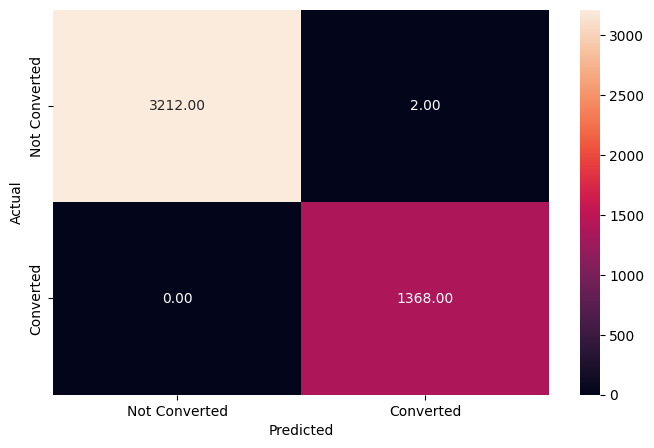

In [ ]:
# Training Dataset Model Performance
y_pred_train_rf = rf.predict(x_train)

# run performance eval and get confusion matrix
metrics_score(y_train, y_pred_train_rf)

#### Test Performance


In [50]:
# Test Dataset Model Performance
rf_test = model_performance_classification(rf, x_test, y_test)
# display performance metrics
rf_test

,Precision,Recall,Accuracy
0,0.84127,0.84127,0.866667


#### Observations on Performance
- The Random Forest classifier is **overfitting** on the training data with a *Recall* of $1$. While on the test data the *Recall* is $0.84$.

#### Feature Importance Check

<Axes: xlabel='Importance', ylabel='None'>

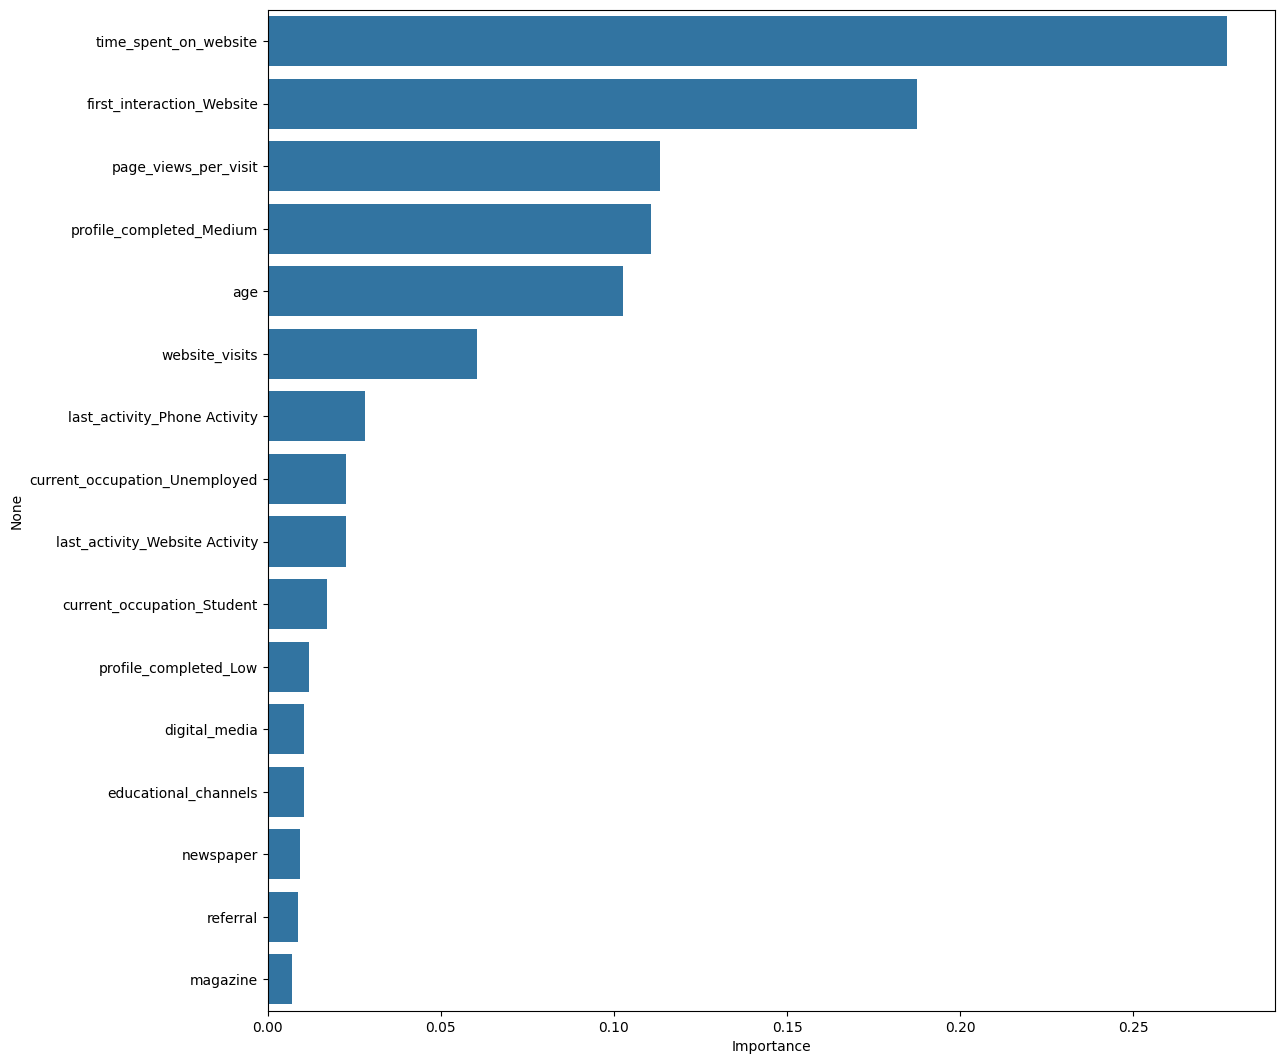

In [ ]:
# get the feature importances from the Random Forest
rf_importances = rf.feature_importances_
# get the feature labels
rf_cols = X.columns
# create a dataframe of row=feature_name col=Importance 
rf_importance_df = pd.DataFrame(rf_importances, index=rf_cols, columns=['Importance']).sort_values(by='Importance', ascending=False)
# plot feature against importance value
plt.figure(figsize=(13,13))
sns.barplot(x=rf_importance_df['Importance'], y=rf_importance_df.index)

**Observations**
- Similar to our single decision tree from earlier, we see that **time_spent_on_website** and **first_interaction_website** are the two most important features to predicting whether or not a lead will convert. 
- **page_views_per_visit** and **profile_completed_medium** have swapped places in level of importance, but still remain the next most important features. Followed once again by **age** and **website_visits**.

### Model Improvement

#### Tuning with GridSearch CV

**Hyperparameters to Tune**
- *n_estimators*: {100, 110, 120}
    - number of trees in the forest
- *max_depth*: {4,5,6}
    - The depth of the tree. 
    - NOTE: Setting this starting with chosen depth from our tuned Decision tree earlier. 
- *min_samples_leaf*: {15, 20, 25}
    - min number of samples required to be a leaf node. 
    - NOTE: this is being set higher because we have a deeper max_depth set. 
- *max_features*: {0.7, 0.9, 'auto'}
    - max number of features to consider when looking at the best split. (70, 90)% or auto.
- *max_samples*: {0.9, 1}
    - max number of samples to take from each feature to train each tree. (90, 100)%.
- *class_weight*: ['balanced', {0:0.3, 1:0.7}]
    - how to weight the classes of the target. (30, 70)% (non-convert, convert).

*NOTE*: since we saw in our Decision Tree that 'entropy' was the best impurity measure for our data we can set the *Criterion* hyperparamter to 'entropy'.

In [52]:
# set classifier to random forest
rf_tuned = RandomForestClassifier(criterion='entropy', random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [4, 5, 6],
    "min_samples_leaf": [15, 20, 25],
    "max_features": [0.7, 0.9, 'auto'],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }
# Set the type of scoring to use to Recall for parameter combination comparisons, 
# and make comparisons on class=1(converted).
scorer = metrics.make_scorer(recall_score, pos_label=1)

# run grid search using k=5 for cross-validation
gridCV = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5)

# fit the cross-validation 
gridCV = gridCV.fit(x_train, y_train)

# save best parameter combination for our estimator 
rf_estimator = gridCV.best_estimator_


In [53]:
# fit best classifier to data
rf_estimator.fit(x_train, y_train)

,n_estimators,100
,criterion,'entropy'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,0.7
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


##### Training Performance

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      3214
           1       0.64      0.89      0.74      1368

    accuracy                           0.82      4582
   macro avg       0.79      0.84      0.80      4582
weighted avg       0.85      0.82      0.82      4582



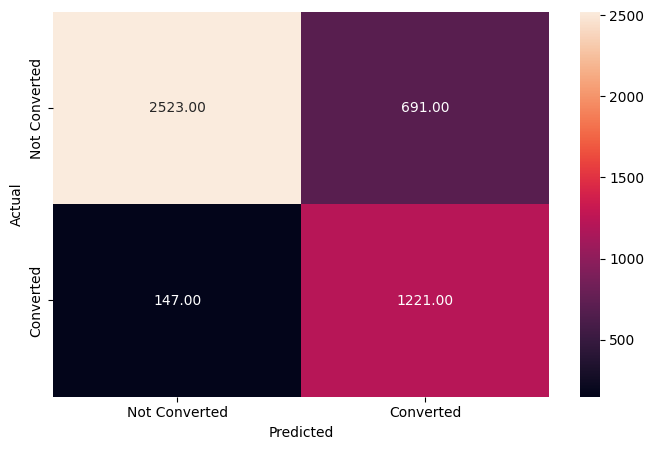

In [54]:
# Tuned Training Dataset Model Performance
y_pred_train_rf_tuned = rf_estimator.predict(x_train)
# run performance eval and get confusion matrix
metrics_score(y_train, y_pred_train_rf_tuned)

##### Test Performance

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        21
           1       0.64      1.00      0.78         9

    accuracy                           0.83        30
   macro avg       0.82      0.88      0.82        30
weighted avg       0.89      0.83      0.84        30



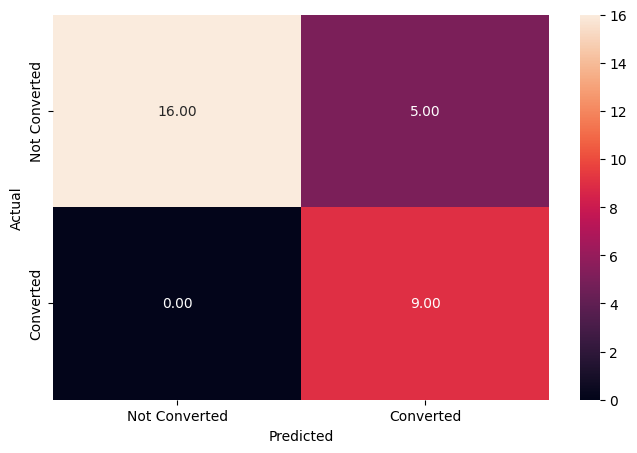

In [ ]:
# Tuned Test Dataset Model Performance
y_pred_test_rf_tuned = rf_estimator.predict(x_test)
# run performance eval and get confusion matrix
metrics_score(y_test, y_pred_test_rf_tuned)

In [56]:
# Tuned Training Dataset Model Performance
rf_estimator_tuned_test = model_performance_classification(rf_estimator, x_test, y_test)
# display performance metrics
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.821429,0.880952,0.833333


**Observations**
- The Tuned Random Forest on the training set appears to no longer be overfitting on the training data and has performed quite well on the test data. 

##### Feature Importance
Since we can't visualize the decisions made in a Random Forest like we can with a singular Decision Tree, we will look at the relative feature importances **after tuning** and compare them to **before tuning** to see how the decisions may have changed.

<Axes: xlabel='Importance', ylabel='None'>

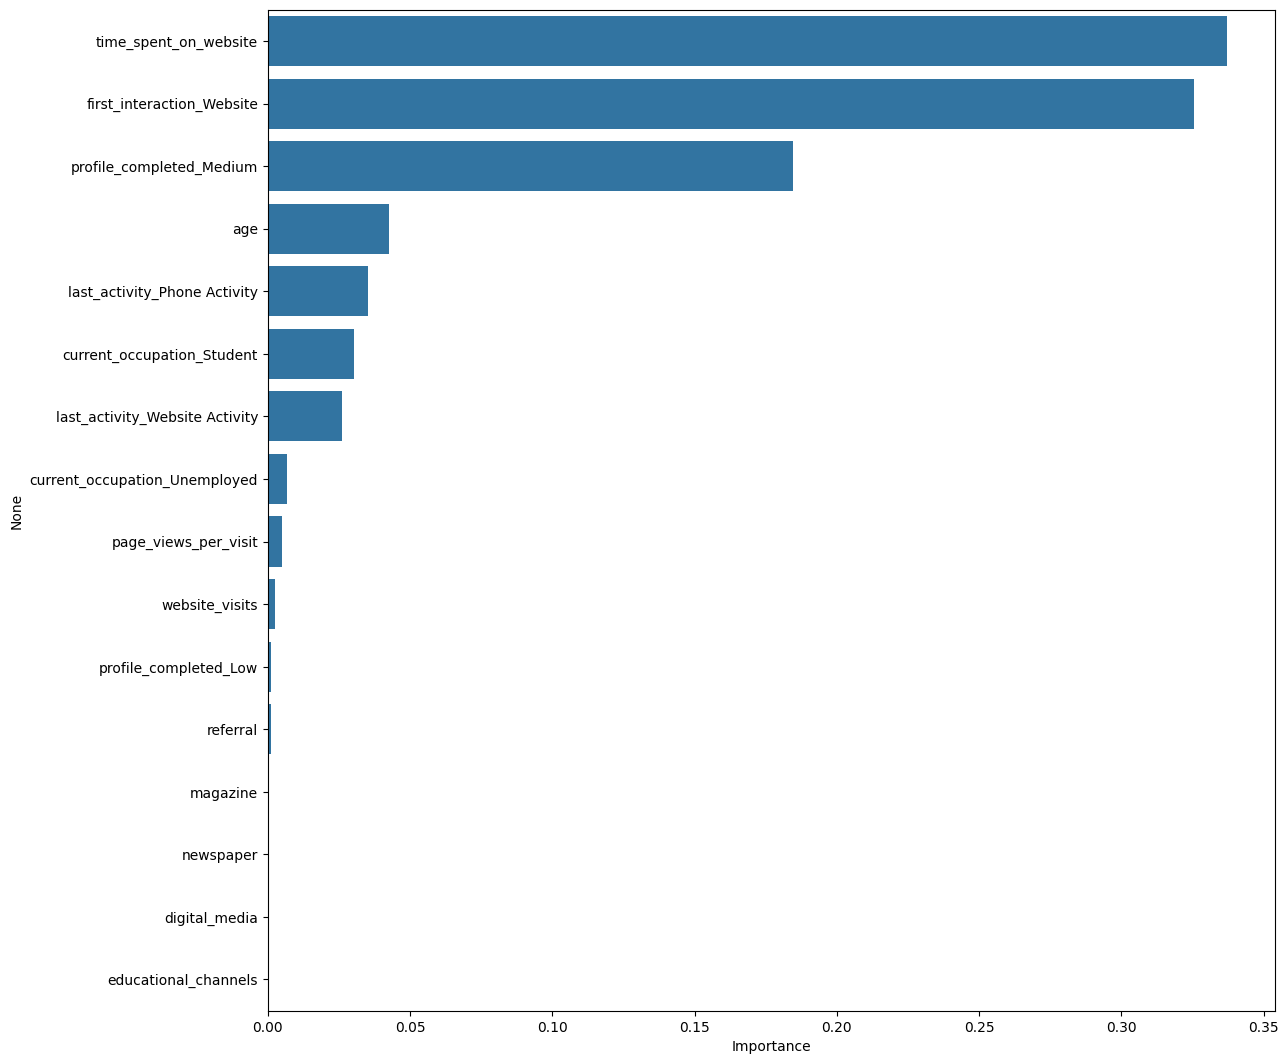

In [57]:
# get the feature importances from the Random Forest
rf_tuned_importances = rf_estimator.feature_importances_
# get the feature labels
rf_tuned_cols = X.columns
# create a dataframe of row=feature_name col=Importance 
rf_tuned_importance_df = pd.DataFrame(rf_tuned_importances, index=rf_cols, columns=['Importance']).sort_values(by='Importance', ascending=False)
# plot feature against importance value
plt.figure(figsize=(13,13))
sns.barplot(x=rf_tuned_importance_df['Importance'], y=rf_tuned_importance_df.index)

**Observations**
- As we can see, the feature importance of our top two important features, **time_spent_one_website** and **first_interaction_website** have *increased* in importance in whether or not a lead will convert. Which correlates with what we expected to see given our earlier EDA.
- Another notable change is the *increased* importance of **profile_completed_medium**. This is reflected in our singular Decision Tree, where on the right-hand side those who completed their profile to medium status were classed as converting.
- The remaining features, as expected, have all decreased in importance.  

## Conclusion


On our chosen metric of **Recall**, the tuned Random Forest performed slightly better, **~88%** than the tuned Decision Tree, **~84%**, for class 1 on the test data. Therefore, the model that ExtraaLearn should use to predict whether or not a lead will convert to a paid customer is the **Tuned Random Forest**.	

## Actionable Insights and Recommendations

### General Profile of a Converted Lead

- Someone whose first interaction with ExtraaLearn was with the website rather than the mobile app.
- Someone who spends a significant amount of time on the ExtraaLearn website.
- Someone who has taken the time to complete their ExtraaLearn profile to at least medium level. 
- Someone who listed that their occupation was Student on their profile.
- Someone who's last interaction with ExtraaLearn was through a phone based activity with an ExtraaLearn representative.

### Insights and Recommendations

### Tuning Using GridSearchCV

**Top Features**<br>
We can see that the ExtraaLearn website is likely key to determining lead convertion with the most important features all being related to the website. These features are:
    - time_spent_on_website
    - first_interaction_website
    - profile_completed_medium

Further investment into the website could include:
- *Profiling leads that spend more time on the website to understand what keeps them coming back after their first interaction* with the website. ExtraaLearn could then use their insight to guide future leads who are 'on the fence'.
- Profile completion is more nuance because only *about 2% of leads are at a Low level of completion* which means that the vast majority of leads complete their profile to at least medium-level. Investigating *what is stopping a medium-completion lead from completing their profile to a high level* is where the benefit may lay. A lead with a more completed profile is more likely to convert because they have taken the time to further their ExtraaLearn experience.
    - This is also important in building a better profile of ExtraaLearn leads which will aid in improving what external factors may contribute to a lead converting.  

However, the importance of these features means that other aspects of the ExtraaLearn experience are not resulting in lead conversion.
- The marked importance of the website means that **the ExtraaLearn Mobile App as a lead's first interaction** appears to make a lead less likely to convert. 
    - If ExtraaLearn would like to continue investing in their Mobile App, then they should *understand how leads are interacting with the Mobile App to gain valuable insights*. 

**Other Features to Note**<br>
Another feature to note, is **Age**. While in our suggested prediction model, age is not a highly important feature, it is still a feature that factors into the decision process. 
- Earlier, we saw that the age distribution of ExtraaLearn users trends older. *ExtraaLearn may want to investigate why this is and how they can branch into younger age* demographics especially since a leads **occupation as a student** is also one of the notable features in our lead predictor. 